
A Confirmation that all columns and cells are completely filled,there are no empty cells and data is in exact type :

feature_name          numbe_of_missing_values
LSOAcode2011                                             0
LSOAname                                                 0
YearendingDec1995                                        0
YearendingDec1996                                        0
YearendingDec1997                                        0
YearendingDec1998                                        0
YearendingDec1999                                        0
YearendingDec2000                                        0
YearendingDec2001                                        0
YearendingDec2002                                        0
YearendingDec2003                                        0
YearendingDec2004                                        0
YearendingDec2005                                        0
YearendingDec2006                                        0
Yearendin

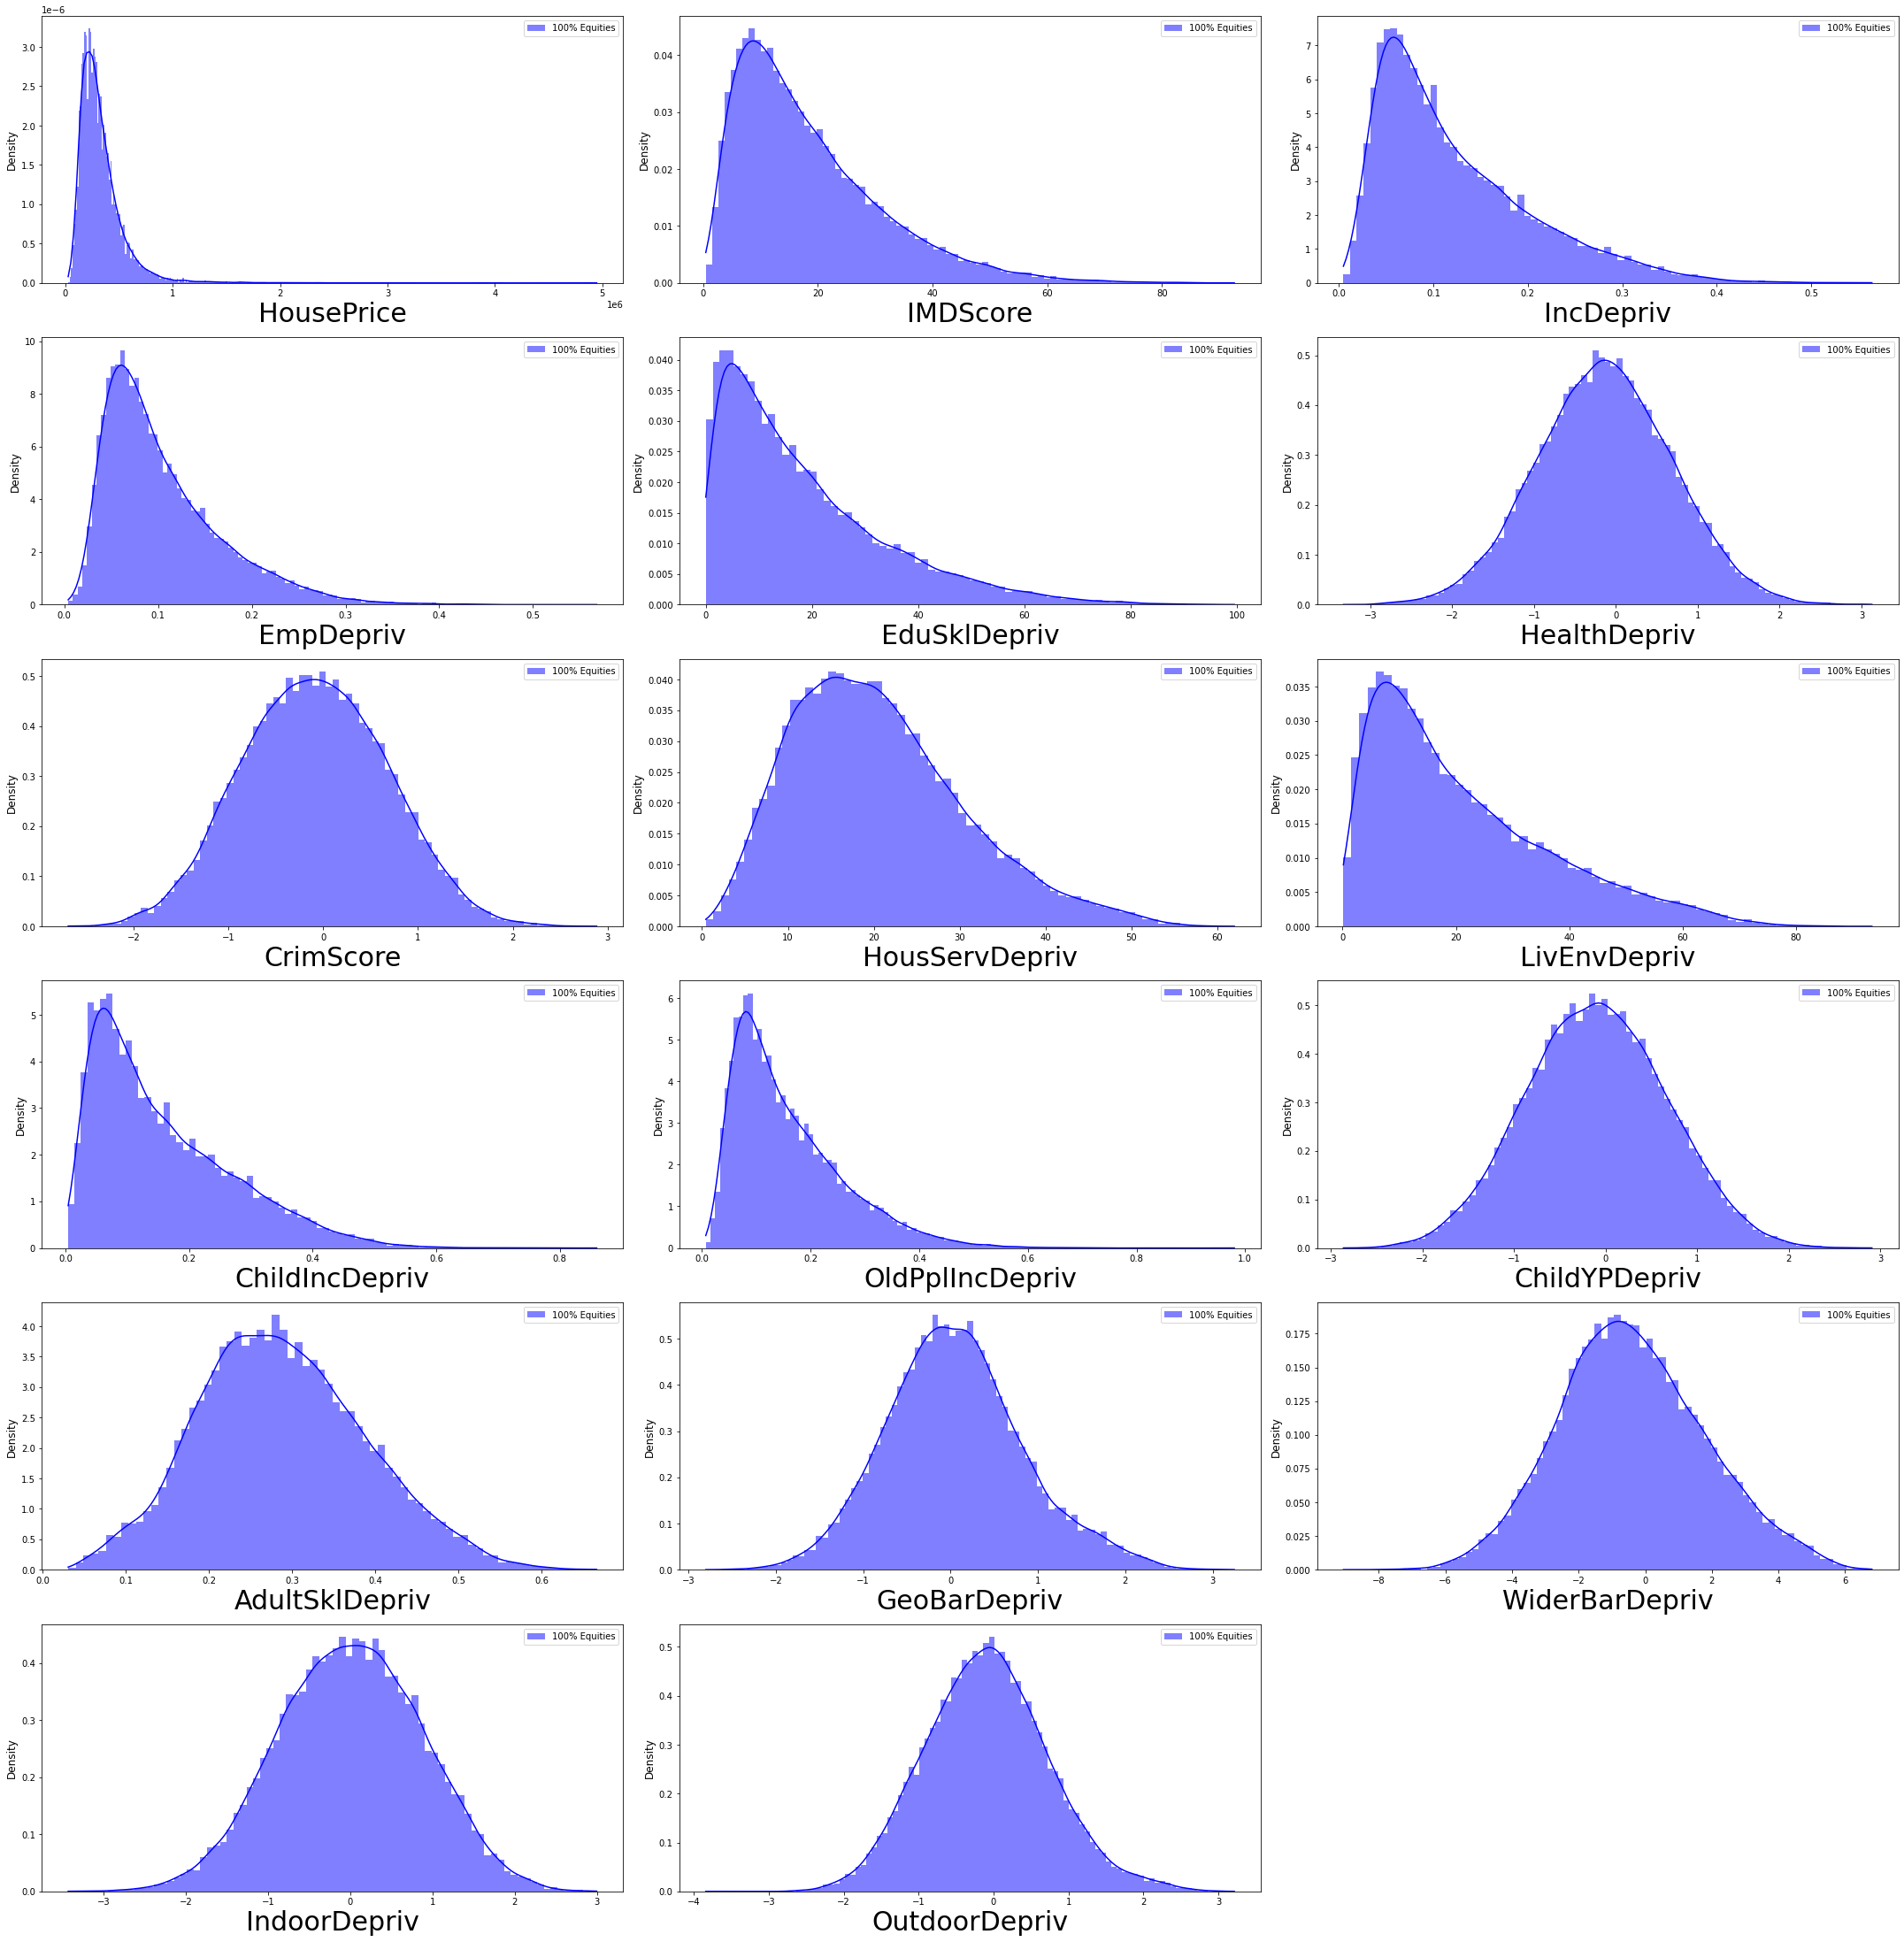

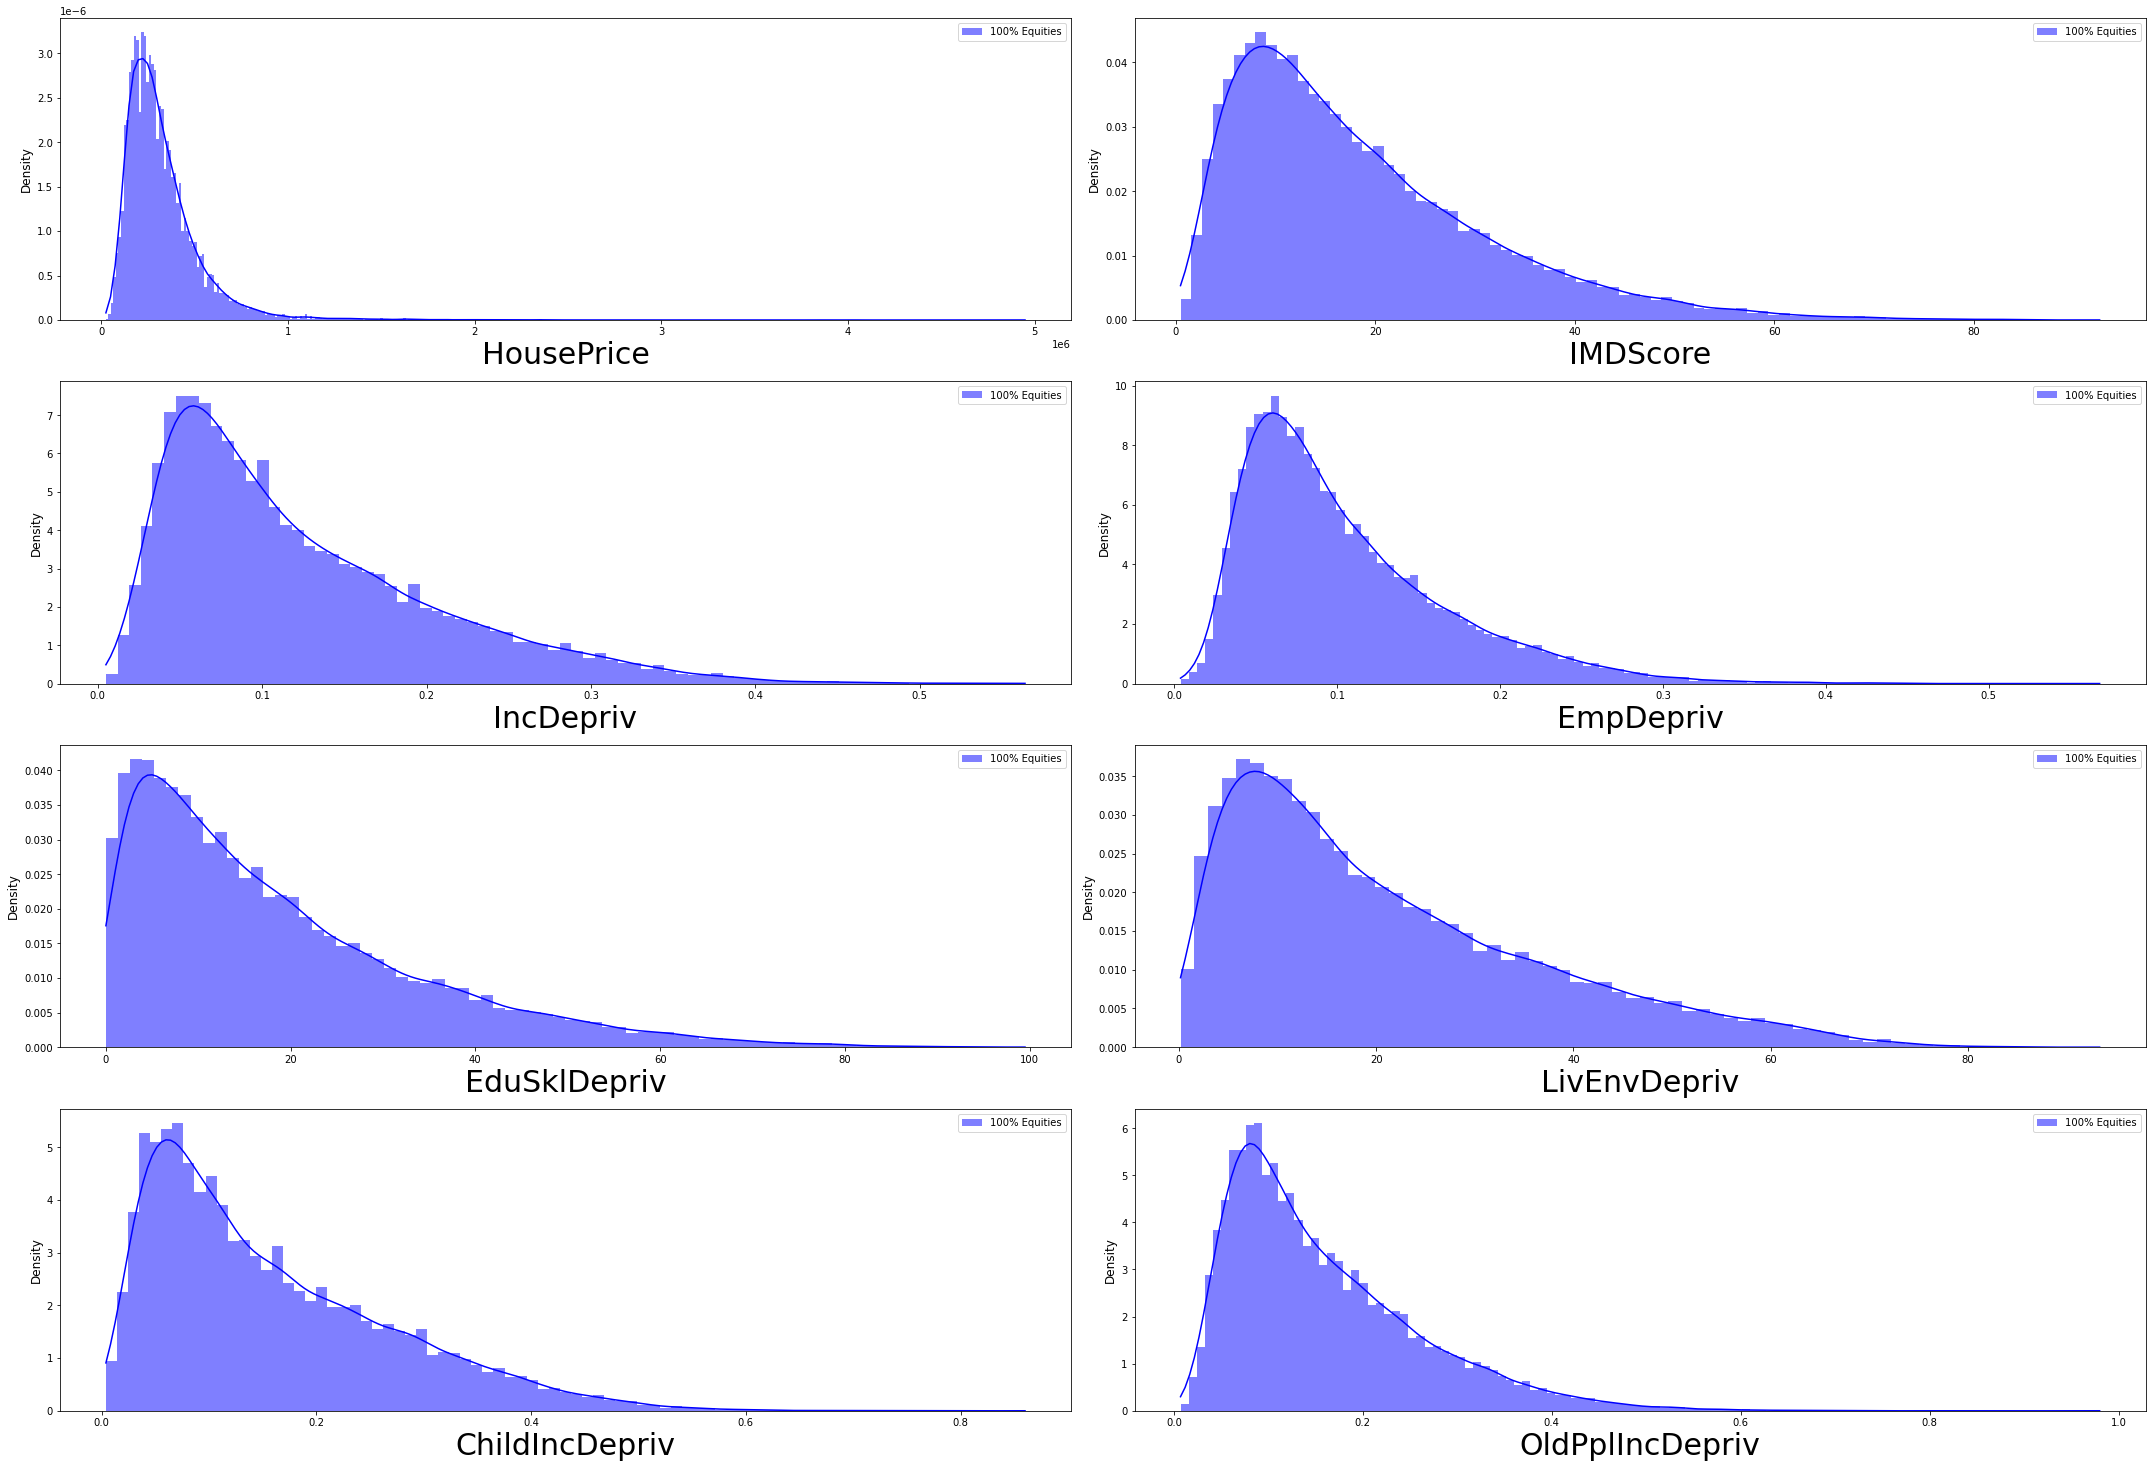

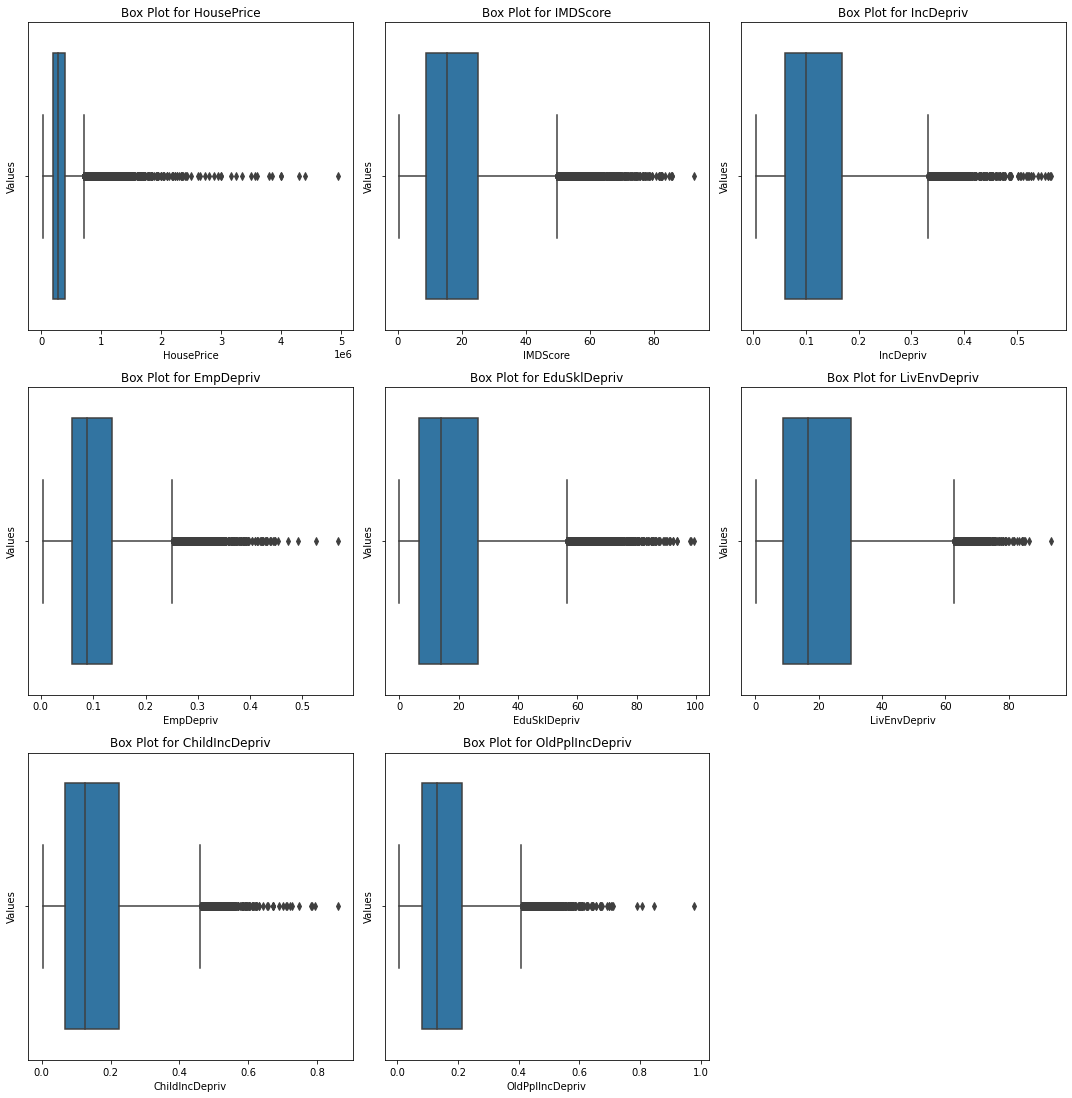

Column: HousePrice
Upper limit: 1006647.8850594109
Lower limit: -345726.3194057309
Before removing outliers: 28003
After removing outliers: 27600
Outliers: 403


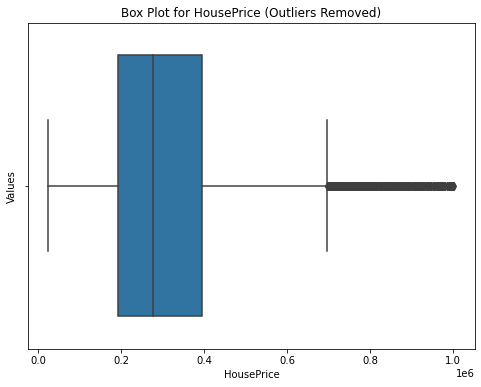

Column: IMDScore
Upper limit: 56.97492645848932
Lower limit: -19.765851603416696
Before removing outliers: 27600
After removing outliers: 27251
Outliers: 349


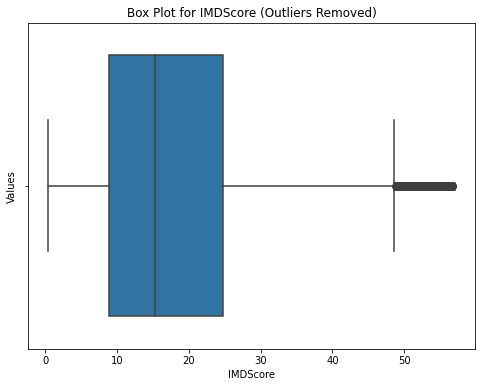

Column: IncDepriv
Upper limit: 0.3517641514838216
Lower limit: -0.10884521272928034
Before removing outliers: 27251
After removing outliers: 27101
Outliers: 150


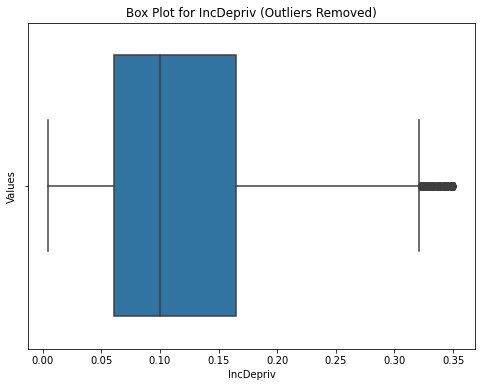

Column: EmpDepriv
Upper limit: 0.27096451309042824
Lower limit: -0.06669529793231527
Before removing outliers: 27101
After removing outliers: 26907
Outliers: 194


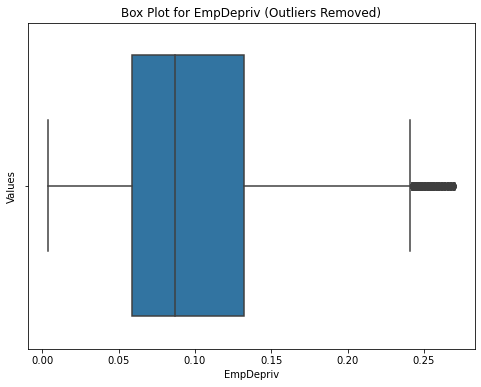

Column: EduSklDepriv
Upper limit: 61.17820038535184
Lower limit: -25.531303667025853
Before removing outliers: 26907
After removing outliers: 26603
Outliers: 304


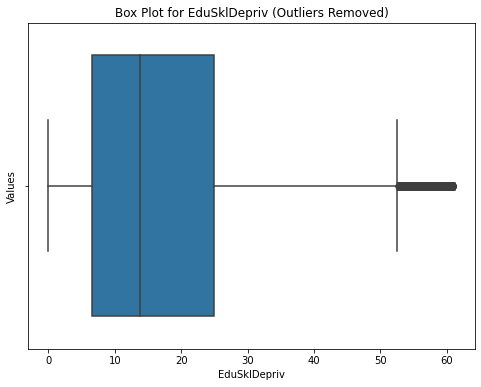

Column: LivEnvDepriv
Upper limit: 66.61683088671367
Lower limit: -25.42366846142344
Before removing outliers: 26603
After removing outliers: 26456
Outliers: 147


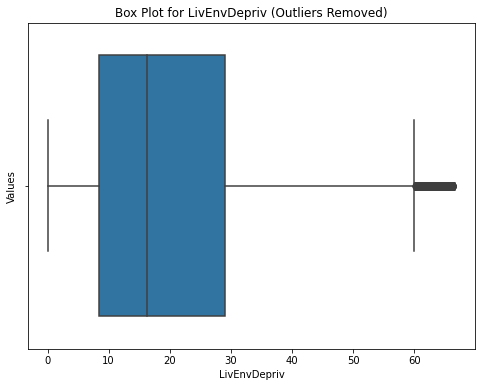

Column: ChildIncDepriv
Upper limit: 0.454834569021555
Lower limit: -0.15563196847725586
Before removing outliers: 26456
After removing outliers: 26324
Outliers: 132


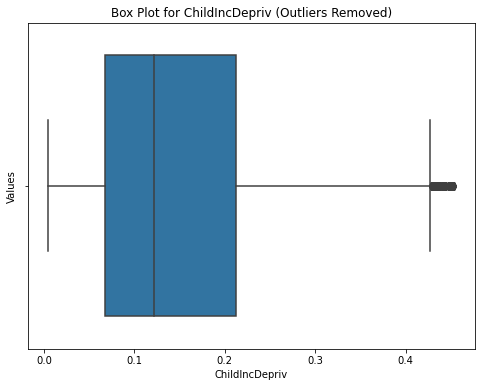

Column: OldPplIncDepriv
Upper limit: 0.4277679637086043
Lower limit: -0.12645699273154914
Before removing outliers: 26324
After removing outliers: 26014
Outliers: 310


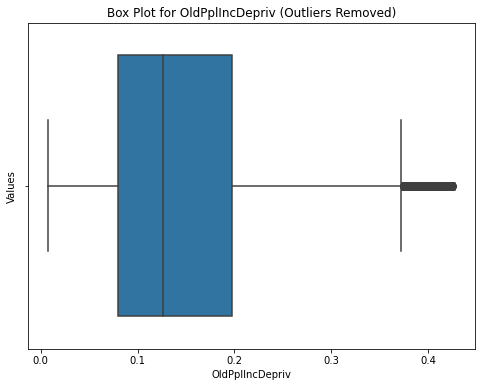

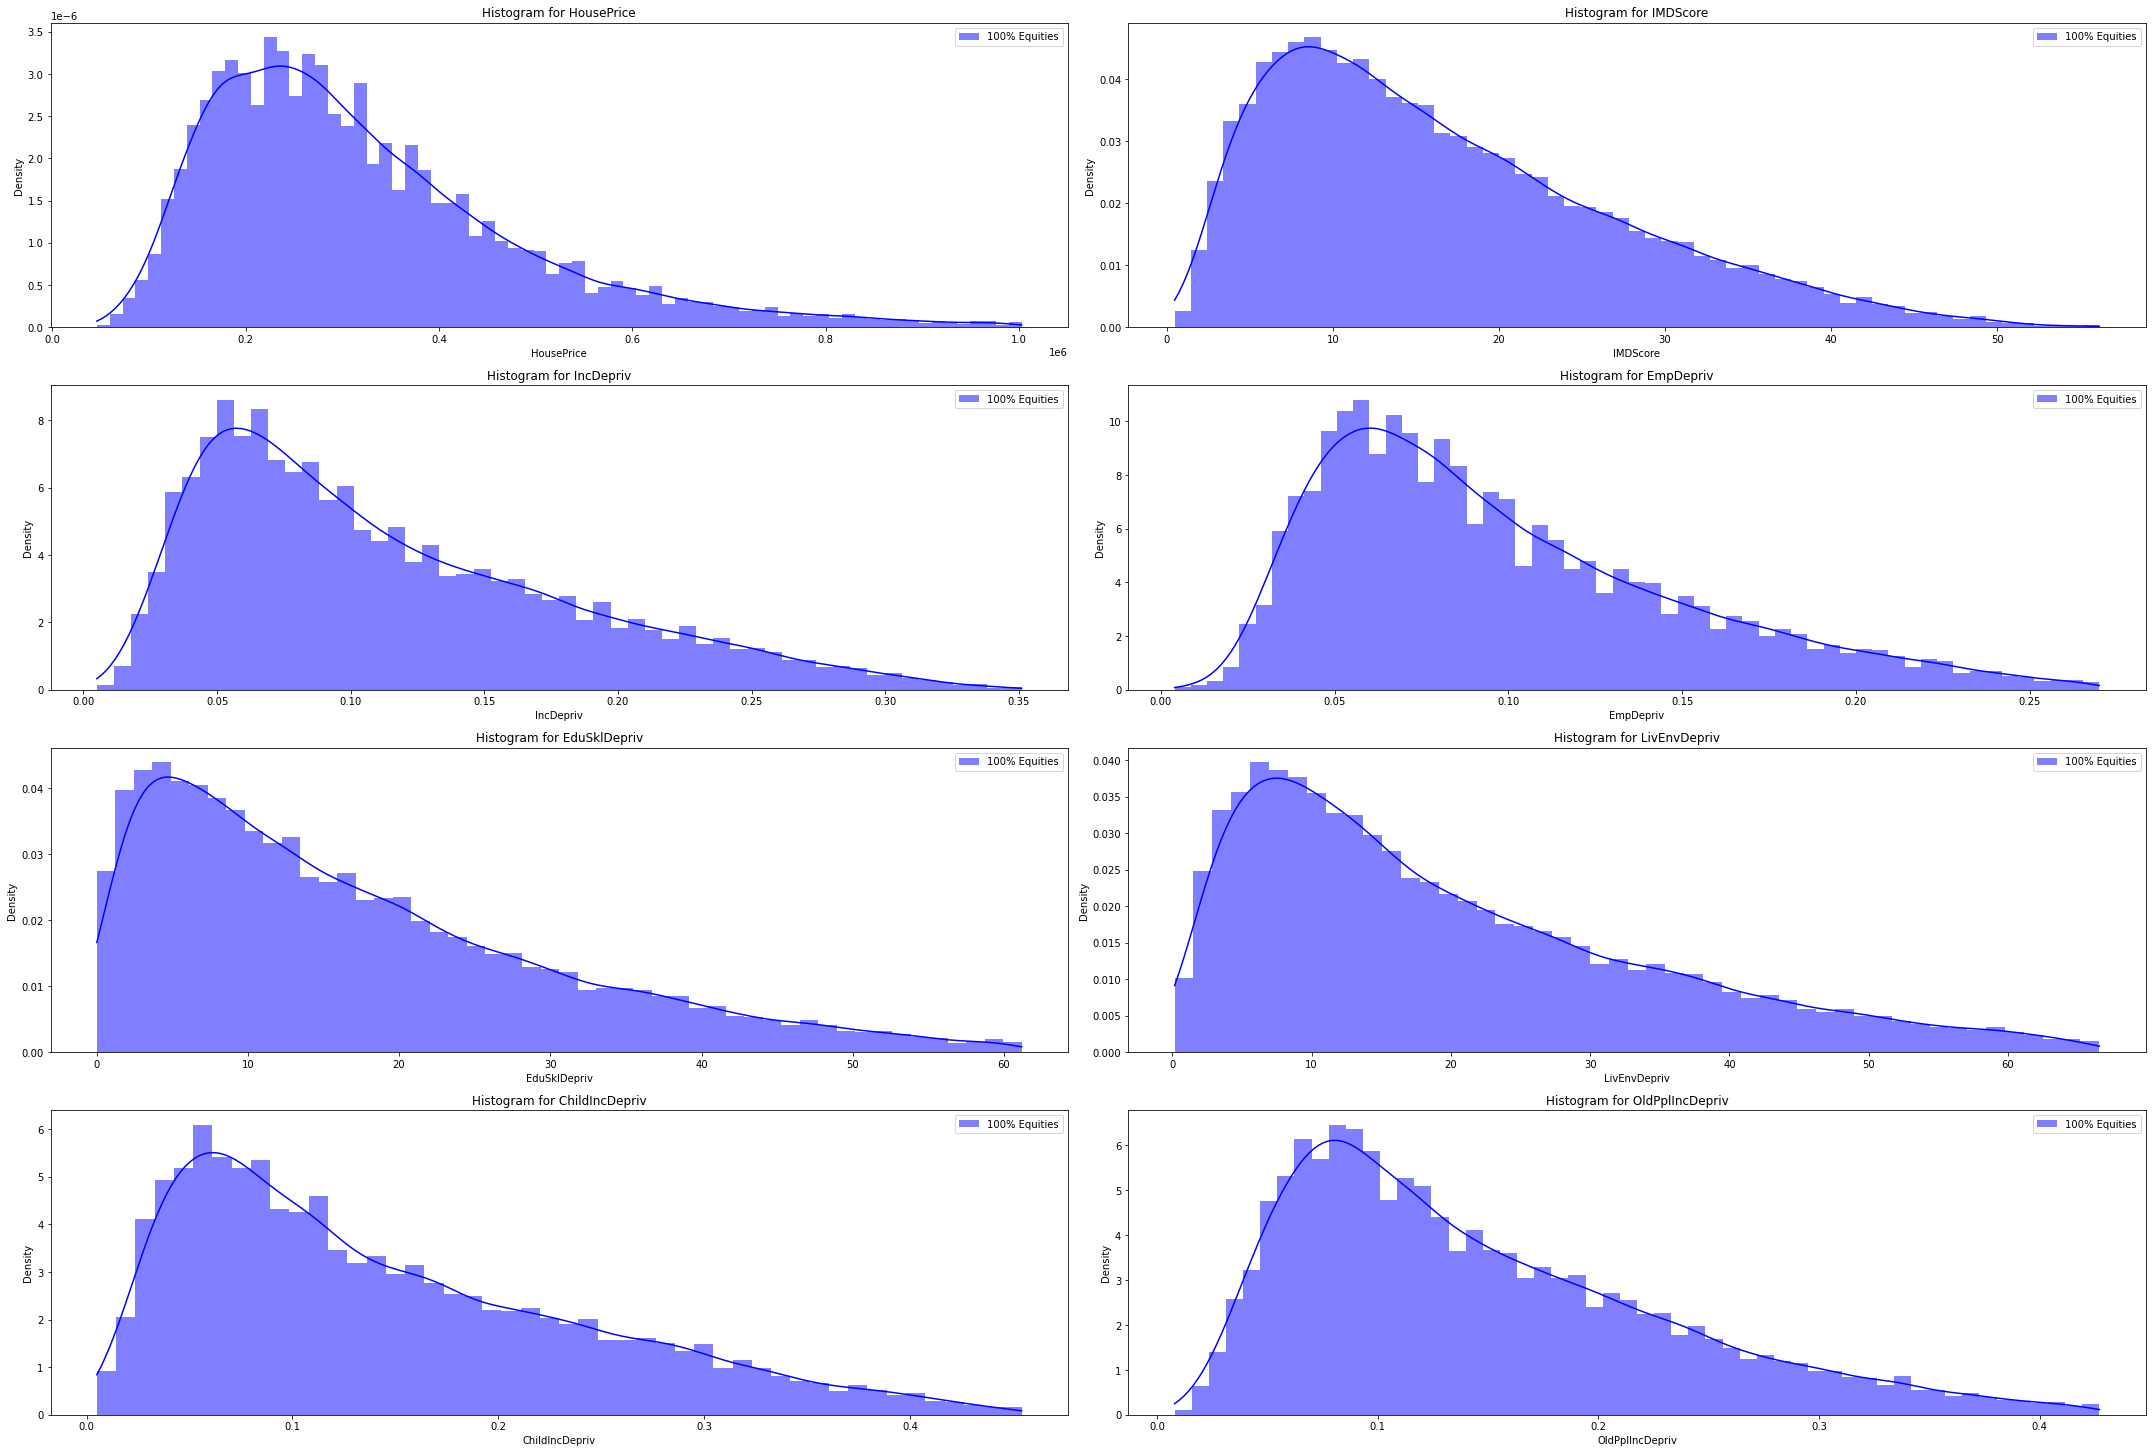

finished preprocessing.....


In [6]:
#Run preprocessing Notebook
#To see the sets in preprocessing please view preprocessing notebook
%run HPP_Preprocessing.ipynb
#The variables we would use from this notebook are featuresNormalized (contains all features normalized) & dfp (normalized dataframe)

In [8]:
featuresForKMeans = [item for item in featuresNormalized if not item.startswith('HousePrice_n')]
print("the features for kmeans model are :\n")
print(featuresForKMeans)
#I am expecting all coloumns ending with _n other than the label because kmeans is unsupervised

the features for kmeans model are :

['IMDScore_n', 'IncDepriv_n', 'EmpDepriv_n', 'EduSklDepriv_n', 'HealthDepriv_n', 'CrimScore_n', 'HousServDepriv_n', 'LivEnvDepriv_n', 'ChildIncDepriv_n', 'OldPplIncDepriv_n', 'ChildYPDepriv_n', 'AdultSklDepriv_n', 'GeoBarDepriv_n', 'WiderBarDepriv_n', 'IndoorDepriv_n', 'OutdoorDepriv_n']


In [9]:
#Selecting the optimal K we use elbow method
#This function helps to produce the elbow plot
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

def evaluate_k_means_elbow_method(data, max_k):
    means = []
    inertias = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k, n_init=10,random_state=80)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)

    # Find the elbow point
    deltas = np.diff(inertias, 2)
    elbow_index = np.argmax(deltas) + 2  # Add 2 due to zero indexing

    # Generate the elbow plot
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(means, inertias, 'o-')
    ax.plot(elbow_index, inertias[elbow_index - 1], marker='o', markersize=8, label='Elbow Point', color='red')
    ax.set_xlabel('Number of Clusters (K)')
    ax.set_ylabel('WCSS (Within-Cluster Sum of Square)')
    ax.grid(True)
    ax.legend()
    de = pd.DataFrame({'Number of Clusters (K)': means, 'WCSS (Within-Cluster Sum of Square)': inertias})
    print(de)
    plt.show()

    Number of Clusters (K)  WCSS (Within-Cluster Sum of Square)
0                        1                         12389.705906
1                        2                          7278.615788
2                        3                          6145.353986
3                        4                          5487.290635
4                        5                          4928.625568
5                        6                          4558.467524
6                        7                          4272.996725
7                        8                          4079.366857
8                        9                          3911.535623
9                       10                          3792.782164
10                      11                          3673.525305
11                      12                          3571.197849
12                      13                          3473.044865
13                      14                          3394.620819
14                      15              

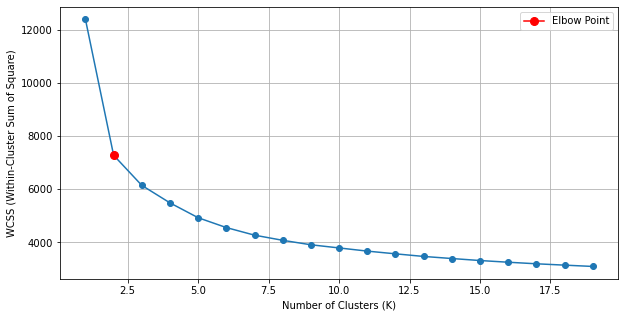

In [10]:
#with 1-20 clusters , drawing the elbow plot
#The graph inidcates the elbow point is at k=2 , but we notice that the line starts to straighten out at k= 5.
evaluate_k_means_elbow_method(dfp[featuresForKMeans],20)

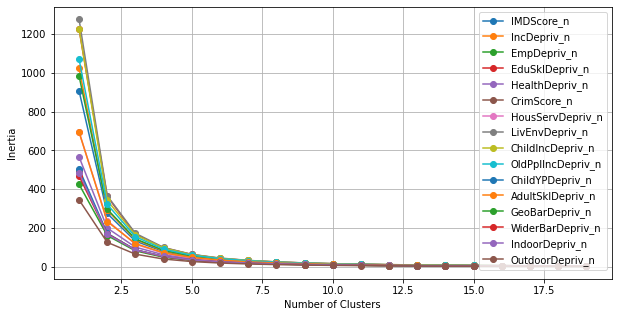

In [11]:
#we matain a random state of 80 through out this evlaution.
#We make further analysis by making an eblow plot for each features
#we notice that the k= 4 seems more like the elnow point
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def optimise_k_means(data, max_k, ax=None):
    means = []
    inertias = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k, n_init=10,random_state=80)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)

    # Plot the elbow curve on the given axis (or create a new one)
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(means, inertias, 'o-', label=data.columns[0])
    ax.set_xlabel('Number of Clusters')
    ax.set_ylabel('Inertia')
    ax.grid(True)


# Define the list of column names for the variables
columns = featuresForKMeans

# Create a single plot to display all elbow curves
fig, ax = plt.subplots(figsize=(10, 5))

# Iterate over each column name
for column in columns:
    ds = dfp[[column]]
    optimise_k_means(ds, 20, ax)

ax.legend()
plt.show()


In [12]:
#Next we try to Optimize the K-means Clustering using Silhouette
#From the graph we notice we have a drop at k= 2 but at k=5 we have another peak point before we start seeing a constant decline
#from the evlaution using a silhoutte score, the model has a good score at k = 5.
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def optimise_k_means_sil(data, max_k):
    sil_score = []
    cluster_list = []

    for k in range(2, max_k):  # Changed the range to start from 2
        cluster_list.append(k)
        kmeans = KMeans(n_clusters=k, n_init=10,random_state=80)
        preds = kmeans.fit_predict(data)  # Removed unnecessary parentheses around data
        score = silhouette_score(data, preds)
        sil_score.append(score)

    fig = plt.subplots(figsize=(10,5))
    plt.plot(cluster_list, sil_score, 'o-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Optimization of K-means Clustering using Silhouette')
    plt.show()


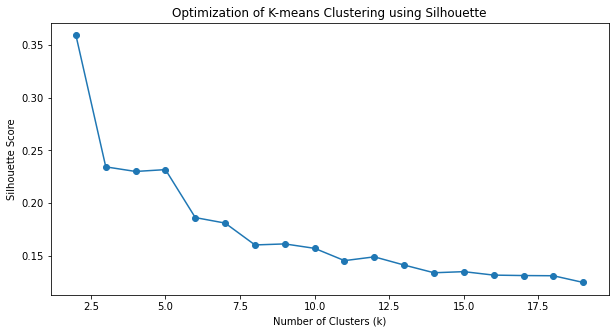

In [13]:
optimise_k_means_sil(dfp[featuresForKMeans], 20)

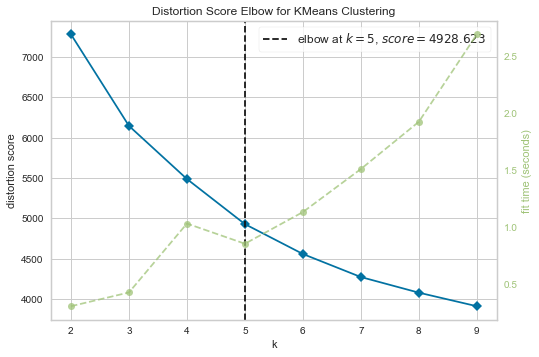

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
#install yellowbrick to vizualize the Elbow curve
#!pip install yellowbrick
#From the graph we compare the elbow plot and silhoutee score
#we noticed that they intersect between k =5 & k =6

from sklearn import datasets
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


X = dfp[featuresForKMeans]

# Instantiate the clustering model and visualizer
km = KMeans(n_clusters=10,n_init=10,random_state=80)
visualizer = KElbowVisualizer(km, k=(2,10))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

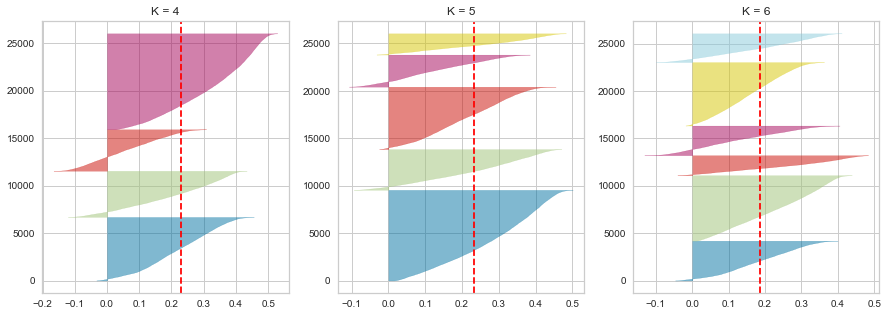

In [17]:
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer

X = dfp[featuresForKMeans]

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

for i, n_clusters in enumerate([4, 5, 6]):
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=n_clusters, n_init=10, random_state=80)

    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[i])  # Corrected the indexing
    visualizer.fit(X)

    # Add label indicating the value of K
    ax[i].set_title(f"K = {n_clusters}")

plt.show()


In [41]:
ftrs = ['IMDScore_n', 'IncDepriv_n', 'EmpDepriv_n', 'EduSklDepriv_n', 
        'HealthDepriv_n', 'CrimScore_n', 'HousServDepriv_n', 'LivEnvDepriv_n', 
        'ChildIncDepriv_n', 'OldPplIncDepriv_n', 'ChildYPDepriv_n', 'AdultSklDepriv_n',
        'GeoBarDepriv_n', 'WiderBarDepriv_n', 'IndoorDepriv_n', 'OutdoorDepriv_n']
#we will build the model with dfk to ensure our original data is not changed
dfk = dfp.loc[:, ftrs]
#change the value of k here
valueOfK = 4
#Building the KMeans Model with K= 4
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=valueOfK, n_init=10, random_state=80)
#Fit the model with the features only
kmeans.fit(dfk[featuresForKMeans])

KMeans(n_clusters=4, random_state=80)

In [42]:
dfk.head()

,IMDScore_n,IncDepriv_n,EmpDepriv_n,EduSklDepriv_n,HealthDepriv_n,CrimScore_n,HousServDepriv_n,LivEnvDepriv_n,ChildIncDepriv_n,OldPplIncDepriv_n,ChildYPDepriv_n,AdultSklDepriv_n,GeoBarDepriv_n,WiderBarDepriv_n,IndoorDepriv_n,OutdoorDepriv_n
0,0.100329,0.017341,0.041353,0.000147,0.207691,0.196635,0.433882,0.517217,0.004454,0.026253,0.129314,0.001805,0.424603,0.740624,0.608300,0.739111
1,0.103777,0.020231,0.048872,0.000458,0.205153,0.188504,0.421269,0.556426,0.002227,0.052506,0.156456,0.005415,0.428737,0.730098,0.665762,0.681185
2,0.342529,0.289017,0.315789,0.156994,0.644739,0.321800,0.510711,0.725529,0.334076,0.362768,0.571345,0.200361,0.398313,0.805925,0.651237,0.843525
3,0.396771,0.369942,0.338346,0.237338,0.505954,0.649461,0.638722,0.456614,0.336303,0.482100,0.477123,0.530686,0.469081,0.840214,0.634796,0.649509
5,0.531530,0.572254,0.368421,0.328967,0.574273,0.666856,0.775022,0.474893,0.645880,0.916468,0.573866,0.546931,0.431878,0.919445,0.634318,0.666373


'Cluster' column successfully dropped.
[0 1 2 3]


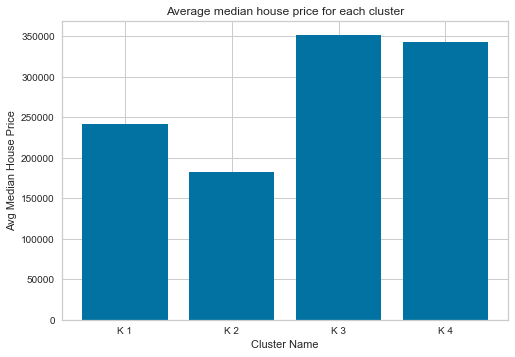

In [43]:
#Lets take a step foward to visualize the cluster and see the characteristics of each cluster
#First We want to see the cluster centers median house price.
#we achieve this by visualizing the mean cluster
dfk = dfp
try:
    # Assuming 'kmeans_5' is the column you want to drop
    dfk.drop('Cluster', axis=1, inplace=True)
    print("'Cluster' column successfully dropped.")
except KeyError:
    print("Error: 'Cluster' column not found in the DataFrame.")
except Exception as e:
    print(f"An error occurred: {e}")

dfk['Cluster'] = kmeans.labels_


#First we need to get all clusters
import numpy as np
clusterIndex = np.sort(dfk["Cluster"].unique())
print(clusterIndex)
clusterName = []
results = []
for cl in clusterIndex:
    dtTemp = dfk[dfk["Cluster"] == cl]
    results.append(dtTemp['HousePrice'].median())
    clusterName.append("K " + str(cl+1))

x_axis = clusterName
y_axis = results

plt.bar(x_axis, y_axis)
plt.title('Average median house price for each cluster')
plt.xlabel('Cluster Name')
plt.ylabel('Avg Median House Price')
plt.show()

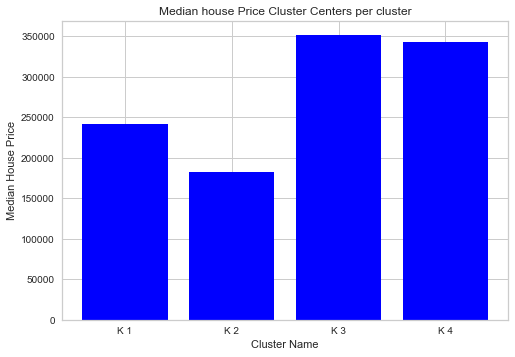

,0,1,2,3
IMDScore_n,0.320322,0.596770,0.304057,0.125226
IncDepriv_n,0.359734,0.641136,0.270476,0.148321
EmpDepriv_n,0.407418,0.654919,0.286685,0.200904
EduSklDepriv_n,0.369732,0.576743,0.169098,0.119633
HealthDepriv_n,0.594843,0.721370,0.525083,0.433118
CrimScore_n,0.499173,0.610184,0.509364,0.393409
HousServDepriv_n,0.280621,0.340397,0.426828,0.298956
LivEnvDepriv_n,0.229387,0.420957,0.586025,0.162072
ChildIncDepriv_n,0.363550,0.648273,0.274363,0.137045
OldPplIncDepriv_n,0.356208,0.617578,0.349138,0.168529


In [48]:
#lets visualize the average price of house for each cluster
#First we need to get all clusters
import numpy as np
clusterIndex = np.sort(dfk["Cluster"].unique())
clusterName = []
averageMedianHouseOfClusters = []
results = []
for cl in clusterIndex:
    dtTemp = dfk[dfk["Cluster"] == cl]
    results.append(dtTemp['HousePrice'].median())
    averageMedianHouseOfClusters.append(dtTemp['HousePrice_n'].median())
    clusterName.append("K " + str(cl+1))

x_axis = clusterName
y_axis = results

plt.bar(x_axis, y_axis,color='blue')
plt.title('Median house Price Cluster Centers per cluster')
plt.xlabel('Cluster Name')
plt.ylabel('Median House Price')
plt.show()

#s = ['IndexofMultipleDeprivationIMDScore_n', 'IncomeScorerate_n', 'EmploymentScorerate_n', 'EducationSkillsandTrainingScore_n', 'HealthDeprivationandDisabilityScore_n', 'CrimeScore_n', 'BarrierstoHousingandServicesScore_n', 'LivingEnvironmentScore_n', 'IncomeDeprivationAffectingChildrenIndexIDACIScorerate_n', 'IncomeDeprivationAffectingOlderPeopleIDAOPIScorerate_n', 'ChildrenandYoungPeopleSubdomainScore_n', 'AdultSkillsSubdomainScore_n', 'GeographicalBarriersSubdomainScore_n', 'WiderBarriersSubdomainScore_n', 'IndoorsSubdomainScore_n', 'OutdoorsSubdomainScore_n']
pd.DataFrame(kmeans.cluster_centers_, columns=featuresForKMeans).T

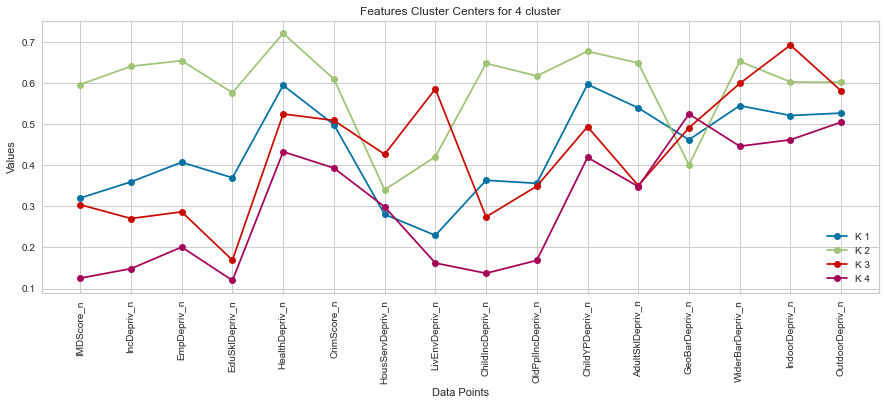

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Lets Visualize the cluster points for each features

# Create a DataFrame with cluster centers and feature names as columns
dfClusterCenters = pd.DataFrame(kmeans.cluster_centers_, columns=featuresForKMeans)

# Assuming you have already defined valueOfK as the number of clusters

# Get the number of clusters
clusterNumber = list(range(0, valueOfK))

# Assuming you have already defined elementsOfDeprivation
elementsOfDeprivation = ['IMDScore_n', 'IncDepriv_n', 'EmpDepriv_n', 'EduSklDepriv_n', 
        'HealthDepriv_n', 'CrimScore_n', 'HousServDepriv_n', 'LivEnvDepriv_n', 
        'ChildIncDepriv_n', 'OldPplIncDepriv_n', 'ChildYPDepriv_n', 'AdultSklDepriv_n',
        'GeoBarDepriv_n', 'WiderBarDepriv_n', 'IndoorDepriv_n', 'OutdoorDepriv_n']

# Create a plot for each cluster
plt.figure(figsize=(15, 5))  # Adjust the width and height as needed
for k in clusterNumber:
    values = []
    for column_name in elementsOfDeprivation:
        value = dfClusterCenters.loc[k, column_name]
        values.append(value)
    
    # Move plt.plot() inside the loop to plot each cluster separately
    plt.plot(range(len(values)), values, label=f'K {k+1}', marker='o')

# Move these lines outside the loop to avoid plotting multiple times
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Features Cluster Centers for '+str(valueOfK)+' cluster')
plt.xticks(range(len(values)), elementsOfDeprivation, rotation=90)  # Replace x-axis labels with feature names and rotate them for readability
plt.grid(True)
plt.legend()
plt.show()


In [50]:
import numpy as np
elementsOfDeprivation = ['IMDScore_n', 'IncDepriv_n', 'EmpDepriv_n', 'EduSklDepriv_n', 
        'HealthDepriv_n', 'CrimScore_n', 'HousServDepriv_n', 'LivEnvDepriv_n', 
        'ChildIncDepriv_n', 'OldPplIncDepriv_n', 'ChildYPDepriv_n', 'AdultSklDepriv_n',
        'GeoBarDepriv_n', 'WiderBarDepriv_n', 'IndoorDepriv_n', 'OutdoorDepriv_n']

cl = np.sort(dfk["Cluster"].unique())
my_dict = {}
for cl in clusterIndex:
    dtTemp = dfk[dfk["Cluster"] == cl]
    elements = []
    for element in elementsOfDeprivation:
        avgElementOfDeprivation = dtTemp[element].median()
        elements.append(avgElementOfDeprivation)
        #print("The avg "+element+" for cluster "+str(cl)+" is "+str(avgElementOfDeprivation))
        
    my_dict["K"+str(cl+1)] = elements
    
#print(my_dict)
        

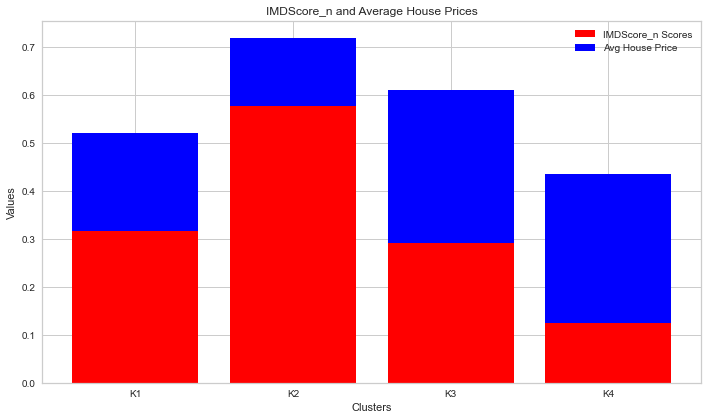

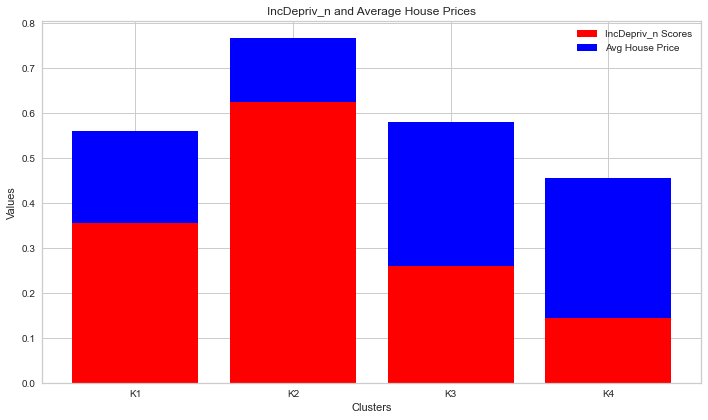

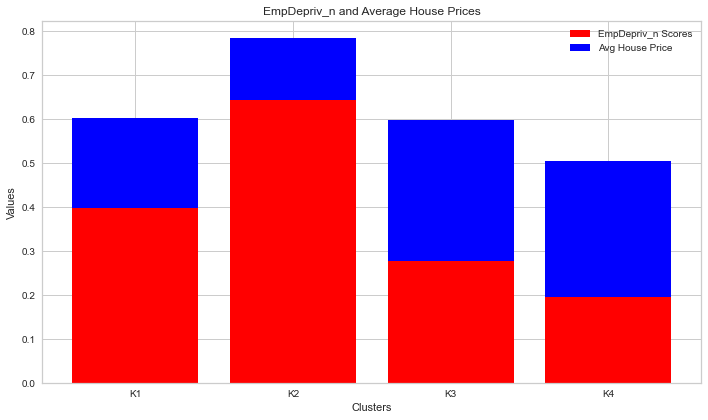

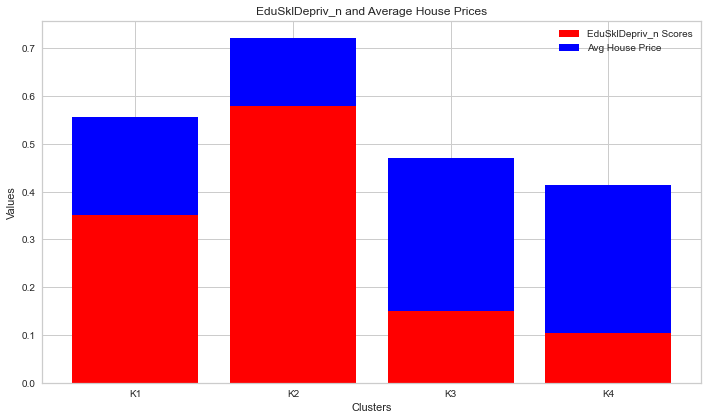

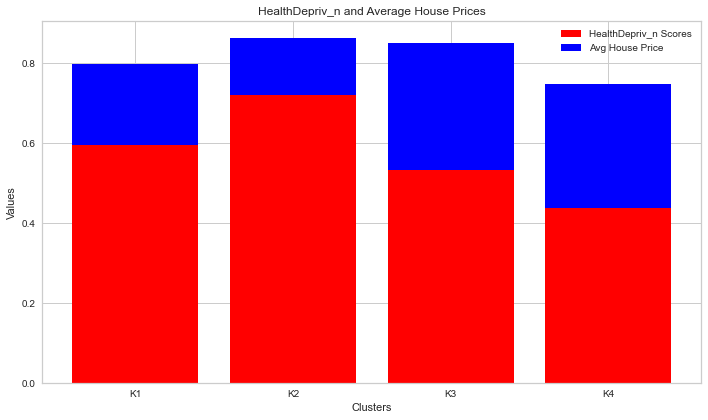

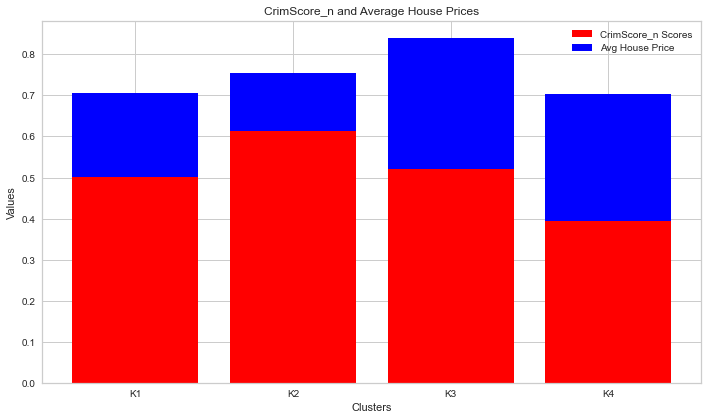

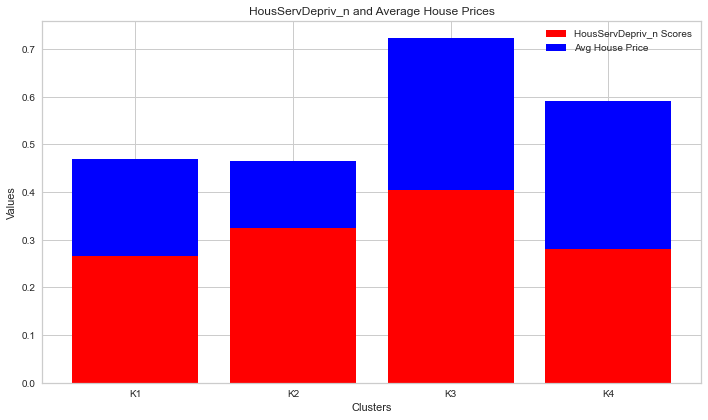

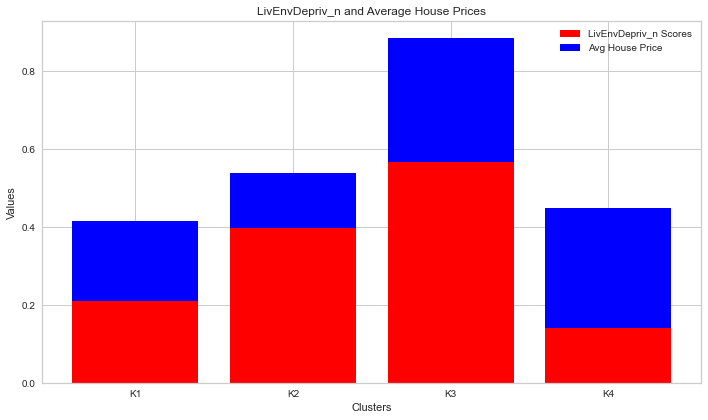

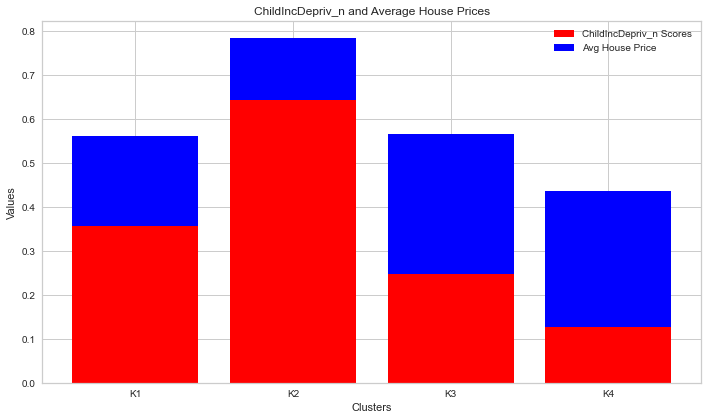

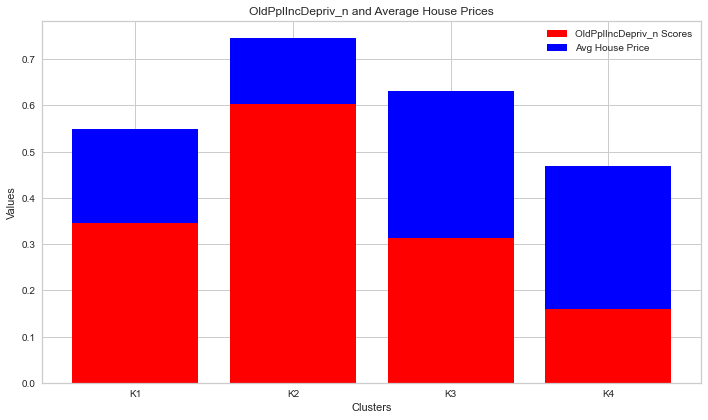

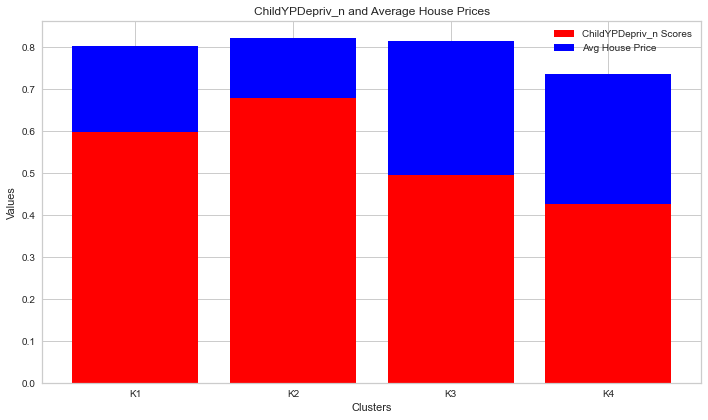

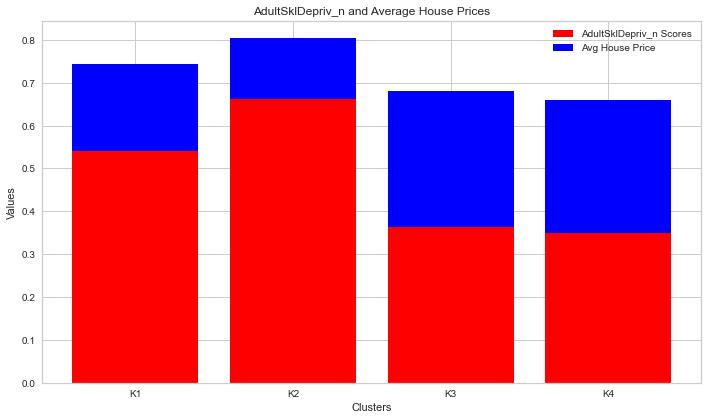

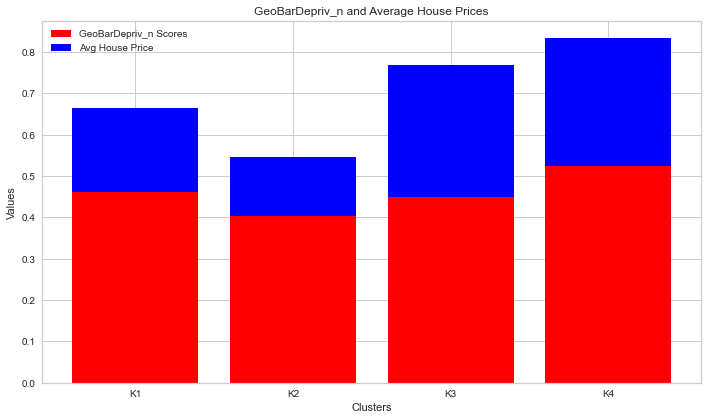

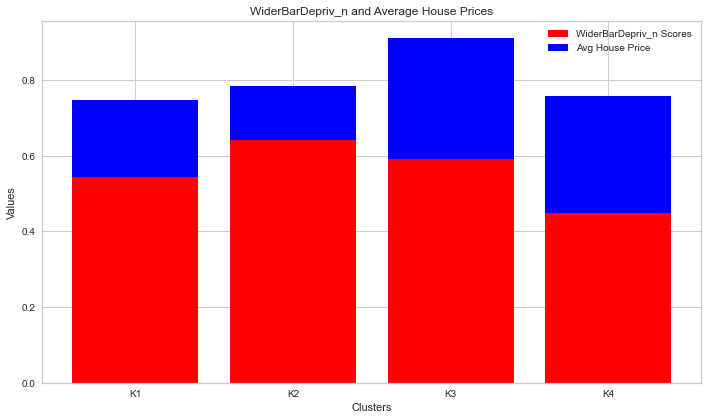

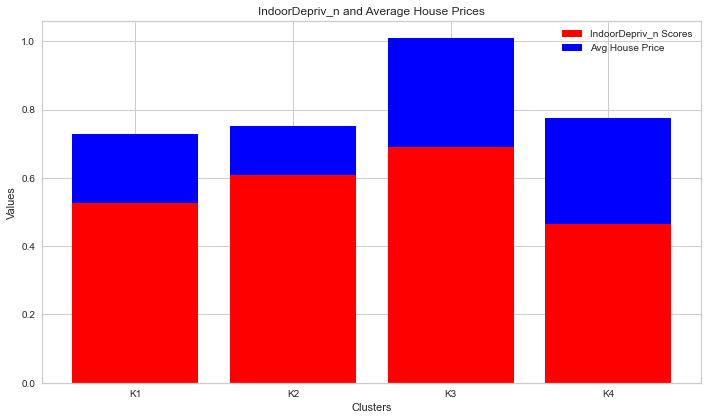

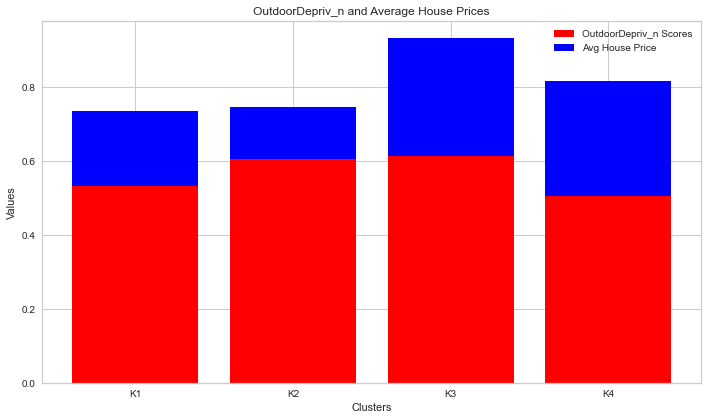

In [51]:
import matplotlib.pyplot as plt

positions = [0,1, 2, 3, 4, 5, 6, 7, 8, 9,10,11,12,13,14,15]

for pos in positions:
    deprivation_index_name = elementsOfDeprivation[pos]
    clusters = list(my_dict.keys())
    elementScores = []

    # Getting the data for the specific deprivation index
    for k in clusters:
        score = my_dict[k][pos]
        elementScores.append(score)

    # Plotting the stacked bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(clusters, elementScores,color='red', label=deprivation_index_name + ' Scores')
    plt.bar(clusters, averageMedianHouseOfClusters,color='blue', bottom=elementScores, label='Avg House Price')

    plt.xlabel('Clusters')
    plt.ylabel('Values')
    plt.title(deprivation_index_name + ' and Average House Prices')
    plt.legend()
    plt.tight_layout()
    plt.show()


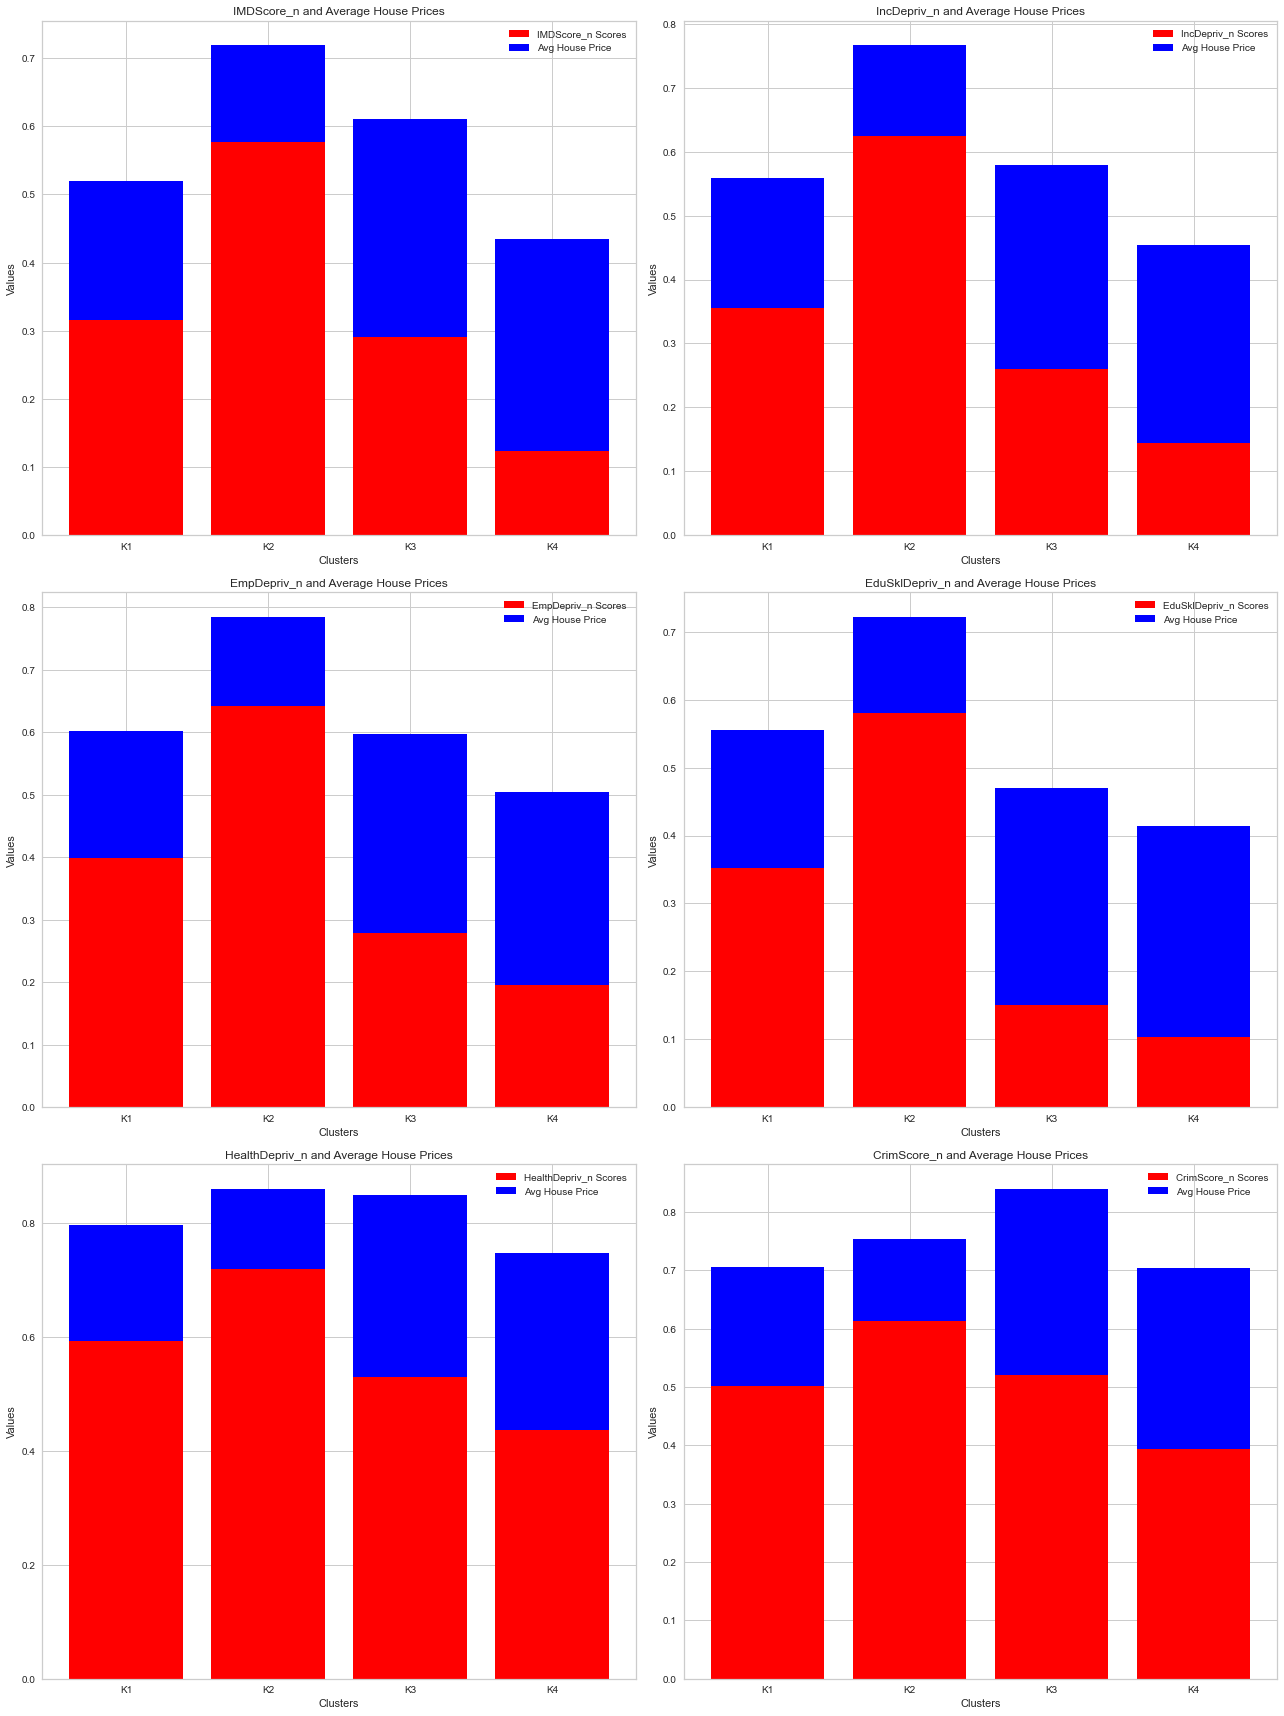

In [55]:
import matplotlib.pyplot as plt

positions = [0, 1, 2, 3, 4,5]
#positions = [5, 6, 7, 8, 9, 10] 
#positions = [11, 12, 13, 14, 15]

# Create a grid of subplots with 2 columns
num_plots = len(positions)
num_rows = int((num_plots + 1) / 2)
fig, axs = plt.subplots(num_rows, 2, figsize=(18, 8*num_rows))  # Adjust the figsize as per your preference

# Flatten the axs array if necessary
if num_plots % 2 != 0:
    axs[-1, -1].axis('off')  # If odd number of plots, remove the last subplot

for i, pos in enumerate(positions):
    deprivation_index_name = elementsOfDeprivation[pos]
    clusters = list(my_dict.keys())
    elementScores = []

    # Getting the data for the specific deprivation index
    for k in clusters:
        score = my_dict[k][pos]
        elementScores.append(score)

    # Plotting the stacked bar chart in the current subplot
    ax = axs[i // 2, i % 2]
    ax.bar(clusters, elementScores, color='red', label=deprivation_index_name + ' Scores')
    ax.bar(clusters, averageMedianHouseOfClusters, color='blue', bottom=elementScores, label='Avg House Price')

    ax.set_xlabel('Clusters')
    ax.set_ylabel('Values')
    ax.set_title(deprivation_index_name + ' and Average House Prices')
    ax.legend()

# To ensure all subplots are visible properly
plt.tight_layout()
plt.show()


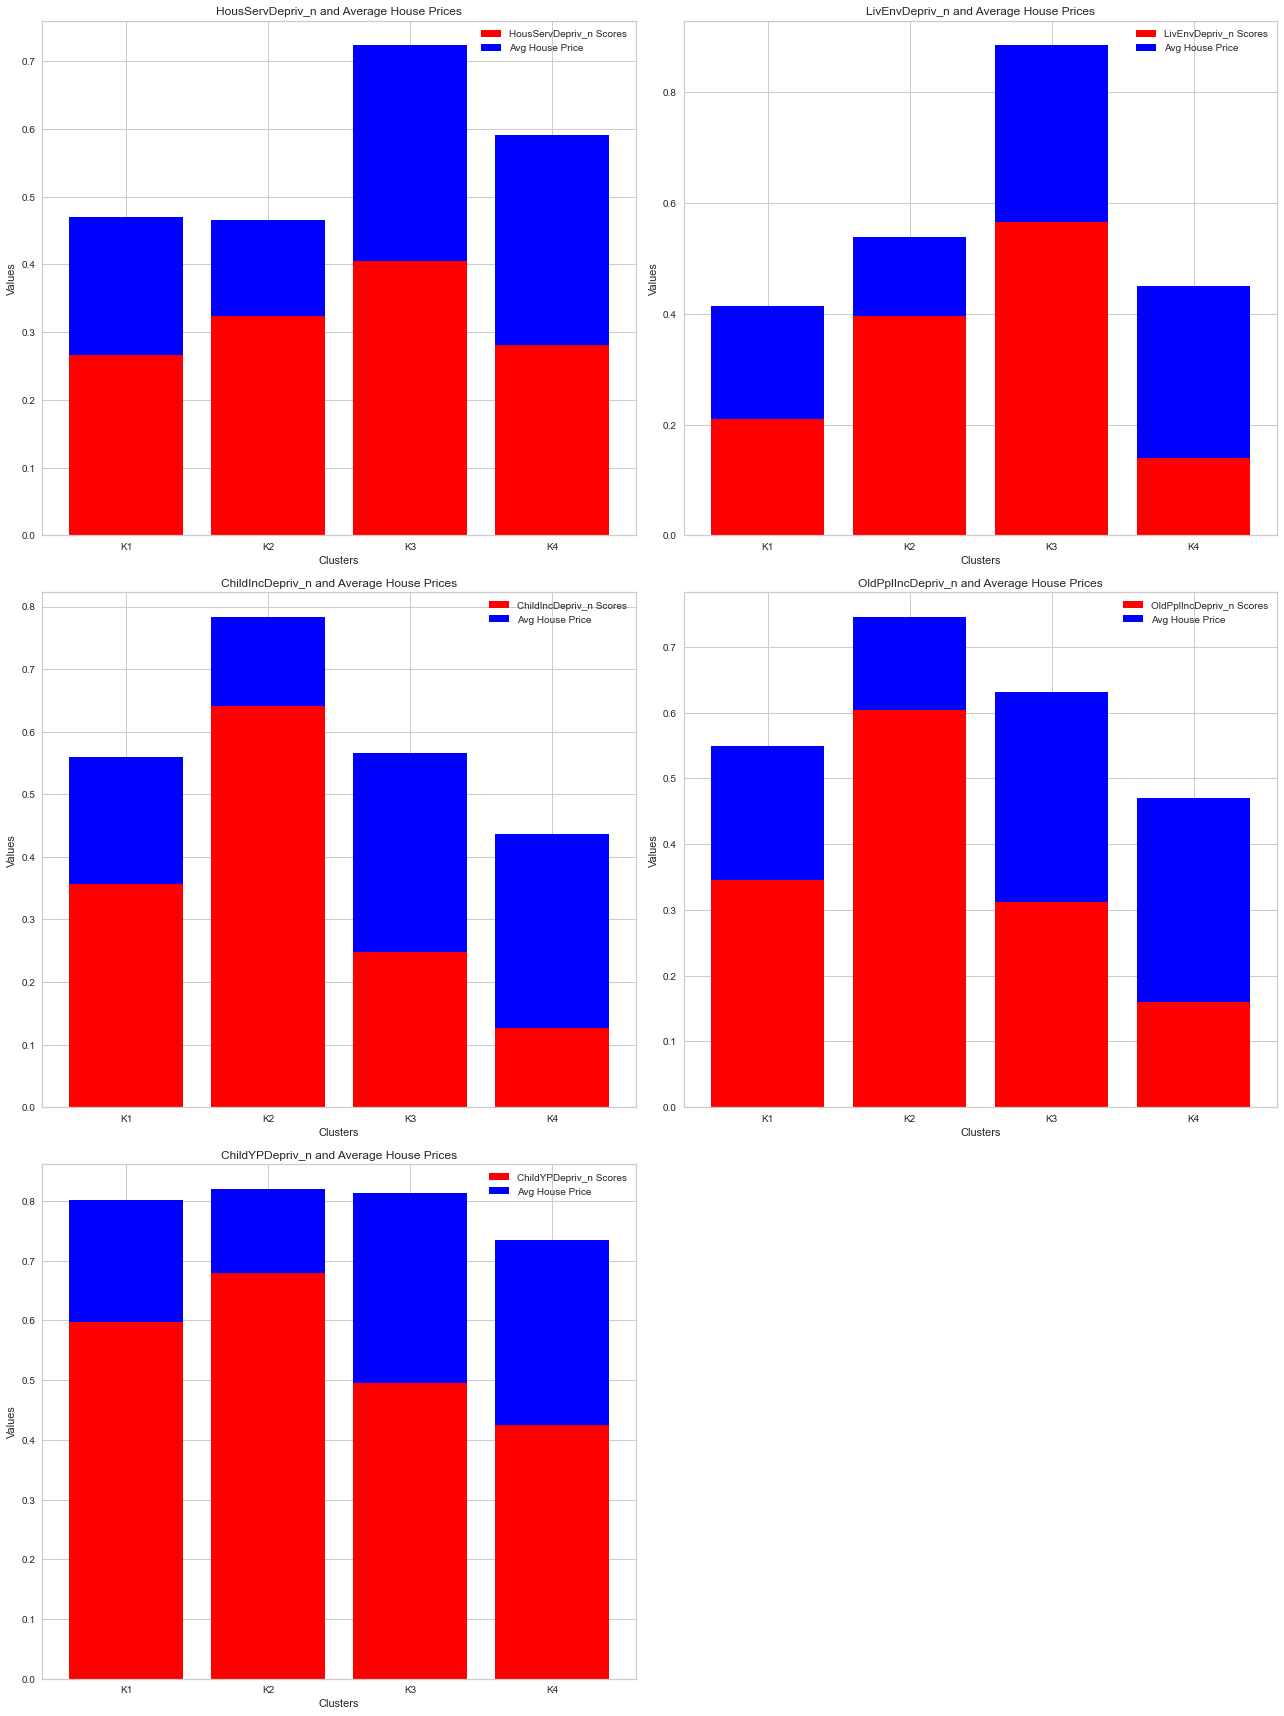

In [56]:
import matplotlib.pyplot as plt

#positions = [0, 1, 2, 3, 4,5]
positions = [ 6, 7, 8, 9, 10] 
#positions = [11, 12, 13, 14, 15]

# Create a grid of subplots with 2 columns
num_plots = len(positions)
num_rows = int((num_plots + 1) / 2)
fig, axs = plt.subplots(num_rows, 2, figsize=(18, 8*num_rows))  # Adjust the figsize as per your preference

# Flatten the axs array if necessary
if num_plots % 2 != 0:
    axs[-1, -1].axis('off')  # If odd number of plots, remove the last subplot

for i, pos in enumerate(positions):
    deprivation_index_name = elementsOfDeprivation[pos]
    clusters = list(my_dict.keys())
    elementScores = []

    # Getting the data for the specific deprivation index
    for k in clusters:
        score = my_dict[k][pos]
        elementScores.append(score)

    # Plotting the stacked bar chart in the current subplot
    ax = axs[i // 2, i % 2]
    ax.bar(clusters, elementScores, color='red', label=deprivation_index_name + ' Scores')
    ax.bar(clusters, averageMedianHouseOfClusters, color='blue', bottom=elementScores, label='Avg House Price')

    ax.set_xlabel('Clusters')
    ax.set_ylabel('Values')
    ax.set_title(deprivation_index_name + ' and Average House Prices')
    ax.legend()

# To ensure all subplots are visible properly
plt.tight_layout()
plt.show()

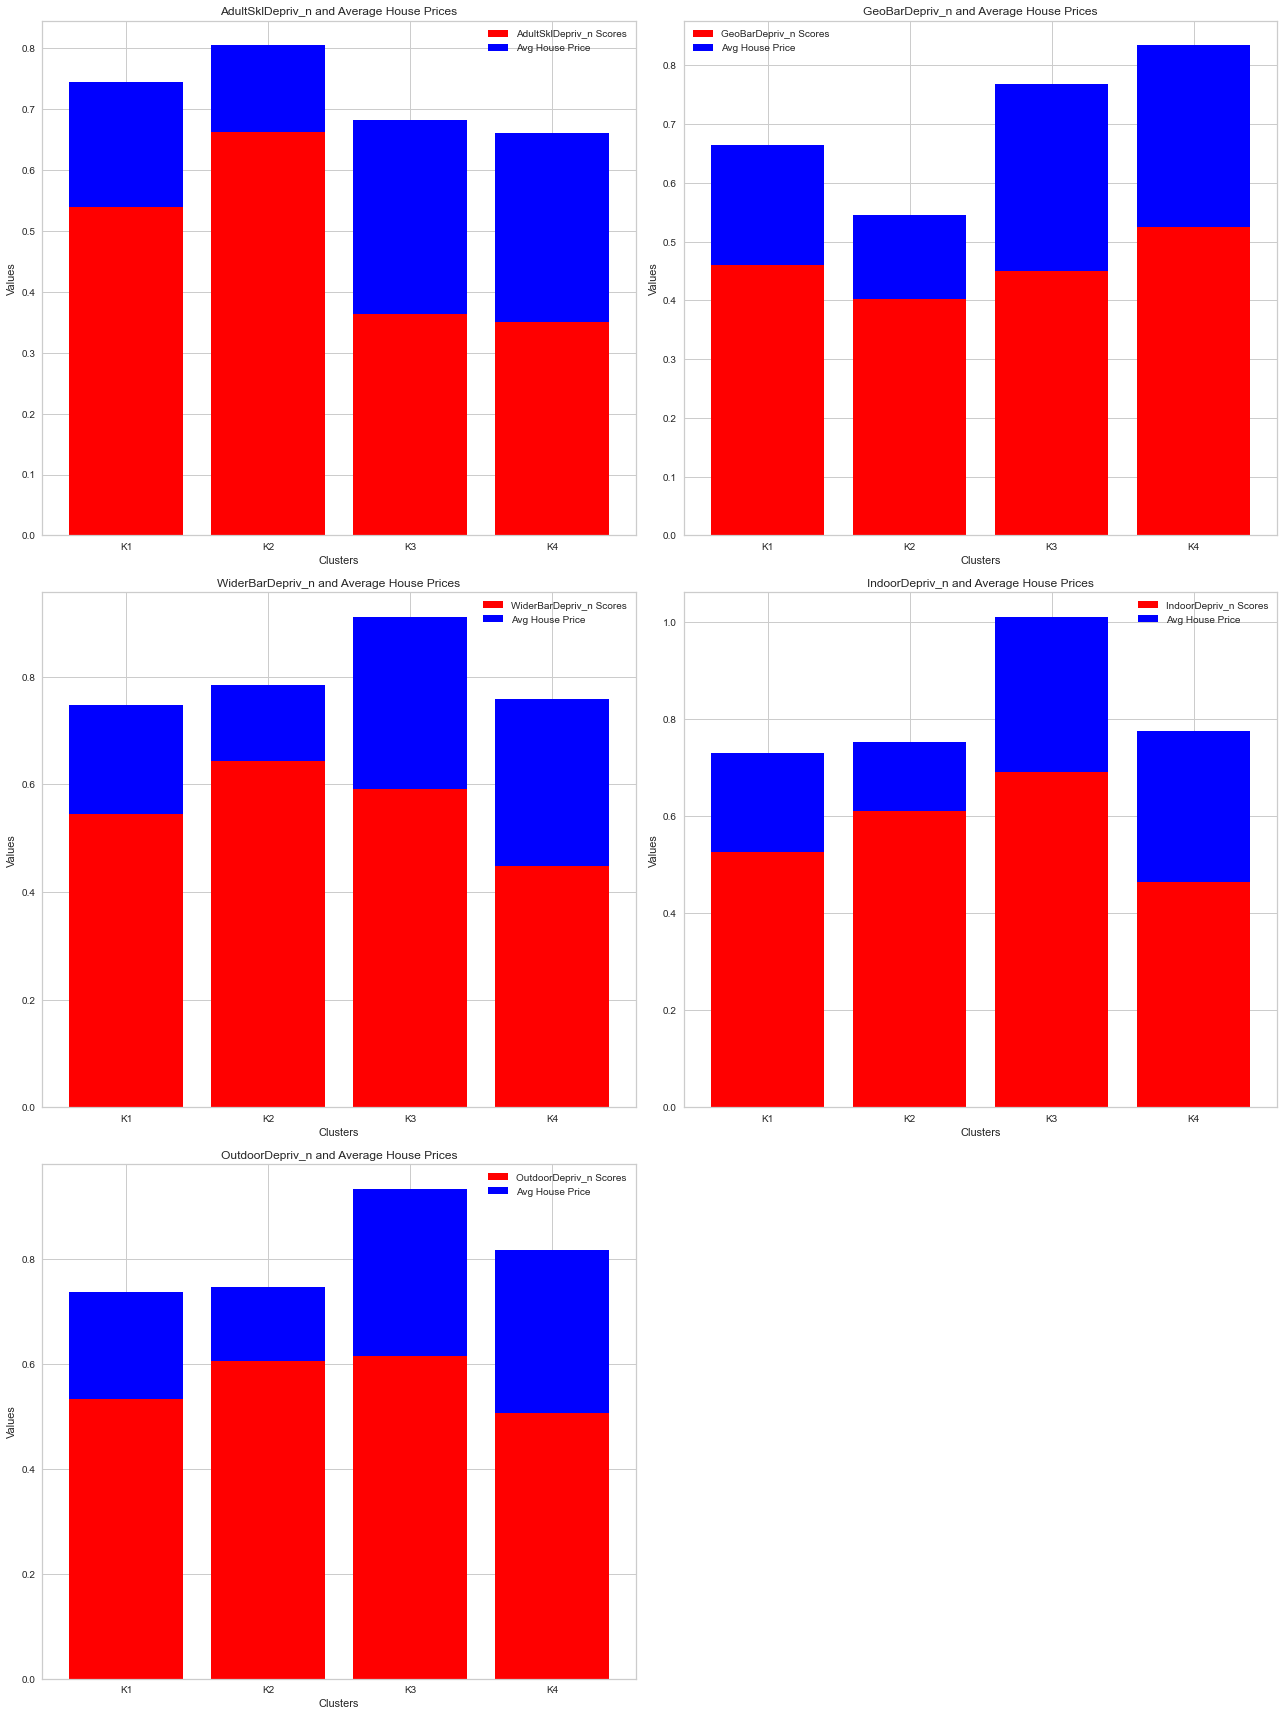

In [57]:
import matplotlib.pyplot as plt

#positions = [0, 1, 2, 3, 4,5]
#positions = [ 6, 7, 8, 9, 10] 
positions = [11, 12, 13, 14, 15]

# Create a grid of subplots with 2 columns
num_plots = len(positions)
num_rows = int((num_plots + 1) / 2)
fig, axs = plt.subplots(num_rows, 2, figsize=(18, 8*num_rows))  # Adjust the figsize as per your preference

# Flatten the axs array if necessary
if num_plots % 2 != 0:
    axs[-1, -1].axis('off')  # If odd number of plots, remove the last subplot

for i, pos in enumerate(positions):
    deprivation_index_name = elementsOfDeprivation[pos]
    clusters = list(my_dict.keys())
    elementScores = []

    # Getting the data for the specific deprivation index
    for k in clusters:
        score = my_dict[k][pos]
        elementScores.append(score)

    # Plotting the stacked bar chart in the current subplot
    ax = axs[i // 2, i % 2]
    ax.bar(clusters, elementScores, color='red', label=deprivation_index_name + ' Scores')
    ax.bar(clusters, averageMedianHouseOfClusters, color='blue', bottom=elementScores, label='Avg House Price')

    ax.set_xlabel('Clusters')
    ax.set_ylabel('Values')
    ax.set_title(deprivation_index_name + ' and Average House Prices')
    ax.legend()

# To ensure all subplots are visible properly
plt.tight_layout()
plt.show()

In [6]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Select the columns for clustering
columns_for_clustering = [
    'IndexofMultipleDeprivationIMDScore_n',
    'IncomeScorerate_n',
    'EmploymentScorerate_n',
    'EducationSkillsandTrainingScore_n',
    'HealthDeprivationandDisabilityScore_n',
    'CrimeScore_n',
    'BarrierstoHousingandServicesScore_n',
    'LivingEnvironmentScore_n',
    'IncomeDeprivationAffectingChildrenIndexIDACIScorerate_n',
    'IncomeDeprivationAffectingOlderPeopleIDAOPIScorerate_n',
    'ChildrenandYoungPeopleSubdomainScore_n',
    'AdultSkillsSubdomainScore_n',
    'GeographicalBarriersSubdomainScore_n',
    'WiderBarriersSubdomainScore_n',
    'IndoorsSubdomainScore_n',
    'OutdoorsSubdomainScore_n'
]

# Create a DataFrame with the selected columns for clustering
X = dfp[columns_for_clustering]

# Standardize the data (optional but often recommended for K-means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means clustering with 6 clusters
num_clusters = 6
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add the cluster labels back to the DataFrame
dfp['Cluster'] = cluster_labels

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f'Silhouette Score: {silhouette_avg}')

# Calculate Davies-Bouldin Index
davies_bouldin_avg = davies_bouldin_score(X_scaled, cluster_labels)
print(f'Davies-Bouldin Index: {davies_bouldin_avg}')


Silhouette Score: 0.17360393647662262
Davies-Bouldin Index: 1.5193914800370427


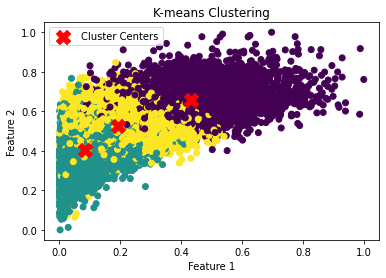

Silhouette Score: 0.2086703799856151
Davies-Bouldin Index: 1.6170293588202733


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Assuming dfp contains your data and featuresForKMeans is the list of features for K-means clustering
features_for_kmeans = [
    'IndexofMultipleDeprivationIMDScore_n',
    'IncomeScorerate_n',
    'EmploymentScorerate_n',
    'EducationSkillsandTrainingScore_n',
    'HealthDeprivationandDisabilityScore_n',
    'CrimeScore_n',
    'BarrierstoHousingandServicesScore_n',
    'LivingEnvironmentScore_n',
    'IncomeDeprivationAffectingChildrenIndexIDACIScorerate_n',
    'IncomeDeprivationAffectingOlderPeopleIDAOPIScorerate_n',
    'ChildrenandYoungPeopleSubdomainScore_n',
    'AdultSkillsSubdomainScore_n',
    'GeographicalBarriersSubdomainScore_n',
    'WiderBarriersSubdomainScore_n',
    'IndoorsSubdomainScore_n',
    'OutdoorsSubdomainScore_n'
]

# Extract the data for K-means clustering
X = dfp[features_for_kmeans].values

# Perform K-means clustering with a chosen number of clusters
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Visualize the clustering results (Note: You need to choose two features to plot them)
feature1_idx = 3  # Choose the index of the first feature to plot
feature2_idx = 4  # Choose the index of the second feature to plot

plt.scatter(X[:, feature1_idx], X[:, feature2_idx], c=cluster_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, feature1_idx], kmeans.cluster_centers_[:, feature2_idx], marker='X', s=200, c='red', label='Cluster Centers')
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.show()

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, cluster_labels)
print(f'Silhouette Score: {silhouette_avg}')

# Calculate Davies-Bouldin Index
davies_bouldin_avg = davies_bouldin_score(X, cluster_labels)
print(f'Davies-Bouldin Index: {davies_bouldin_avg}')


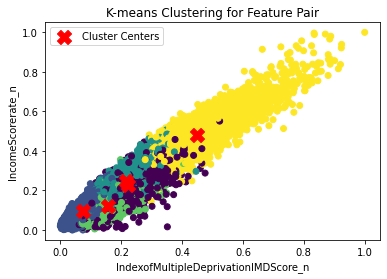

Silhouette Score for IndexofMultipleDeprivationIMDScore_n and IncomeScorerate_n: 0.1647665717593213
Davies-Bouldin Index for IndexofMultipleDeprivationIMDScore_n and IncomeScorerate_n: 4.321875722402488


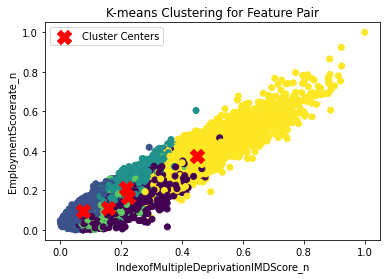

Silhouette Score for IndexofMultipleDeprivationIMDScore_n and EmploymentScorerate_n: 0.17468134655781728
Davies-Bouldin Index for IndexofMultipleDeprivationIMDScore_n and EmploymentScorerate_n: 2.1274724291765645


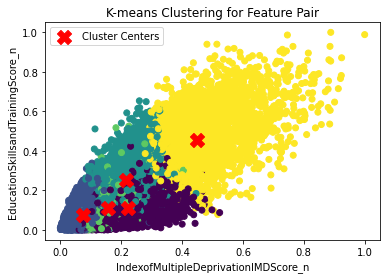

Silhouette Score for IndexofMultipleDeprivationIMDScore_n and EducationSkillsandTrainingScore_n: 0.1768786981510107
Davies-Bouldin Index for IndexofMultipleDeprivationIMDScore_n and EducationSkillsandTrainingScore_n: 1.775745245102252


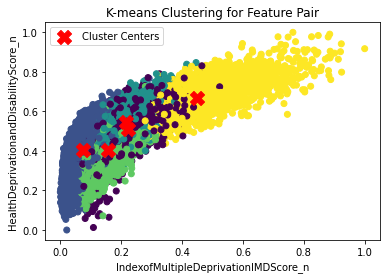

KeyboardInterrupt: 

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Assuming dfp contains your data and featuresForKMeans is the list of features for K-means clustering
features_for_kmeans = [
    'IndexofMultipleDeprivationIMDScore_n',
    'IncomeScorerate_n',
    'EmploymentScorerate_n',
    'EducationSkillsandTrainingScore_n',
    'HealthDeprivationandDisabilityScore_n',
    'CrimeScore_n',
    'BarrierstoHousingandServicesScore_n',
    'LivingEnvironmentScore_n',
    'IncomeDeprivationAffectingChildrenIndexIDACIScorerate_n',
    'IncomeDeprivationAffectingOlderPeopleIDAOPIScorerate_n',
    'ChildrenandYoungPeopleSubdomainScore_n',
    'AdultSkillsSubdomainScore_n',
    'GeographicalBarriersSubdomainScore_n',
    'WiderBarriersSubdomainScore_n',
    'IndoorsSubdomainScore_n',
    'OutdoorsSubdomainScore_n'
]

# Extract the data for K-means clustering
X = dfp[features_for_kmeans].values

# Perform K-means clustering with a chosen number of clusters
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=80)
cluster_labels = kmeans.fit_predict(X)

# Calculate Silhouette Score for all feature pairs
num_features = len(features_for_kmeans)

for i in range(num_features):
    for j in range(i + 1, num_features):
        # Select two features for visualization
        feature1_idx = i
        feature2_idx = j
        
        # Visualize the clustering results for the selected features
        plt.scatter(X[:, feature1_idx], X[:, feature2_idx], c=cluster_labels, cmap='viridis')
        plt.scatter(kmeans.cluster_centers_[:, feature1_idx], kmeans.cluster_centers_[:, feature2_idx], marker='X', s=200, c='red', label='Cluster Centers')
        plt.legend()
        plt.xlabel(features_for_kmeans[feature1_idx])
        plt.ylabel(features_for_kmeans[feature2_idx])
        plt.title('K-means Clustering for Feature Pair')
        plt.show()

        # Calculate Silhouette Score for the selected features
        silhouette_avg = silhouette_score(X[:, [feature1_idx, feature2_idx]], cluster_labels)
        print(f'Silhouette Score for {features_for_kmeans[feature1_idx]} and {features_for_kmeans[feature2_idx]}: {silhouette_avg}')

        # Calculate Davies-Bouldin Index for the selected features
        davies_bouldin_avg = davies_bouldin_score(X[:, [feature1_idx, feature2_idx]], cluster_labels)
        print(f'Davies-Bouldin Index for {features_for_kmeans[feature1_idx]} and {features_for_kmeans[feature2_idx]}: {davies_bouldin_avg}')


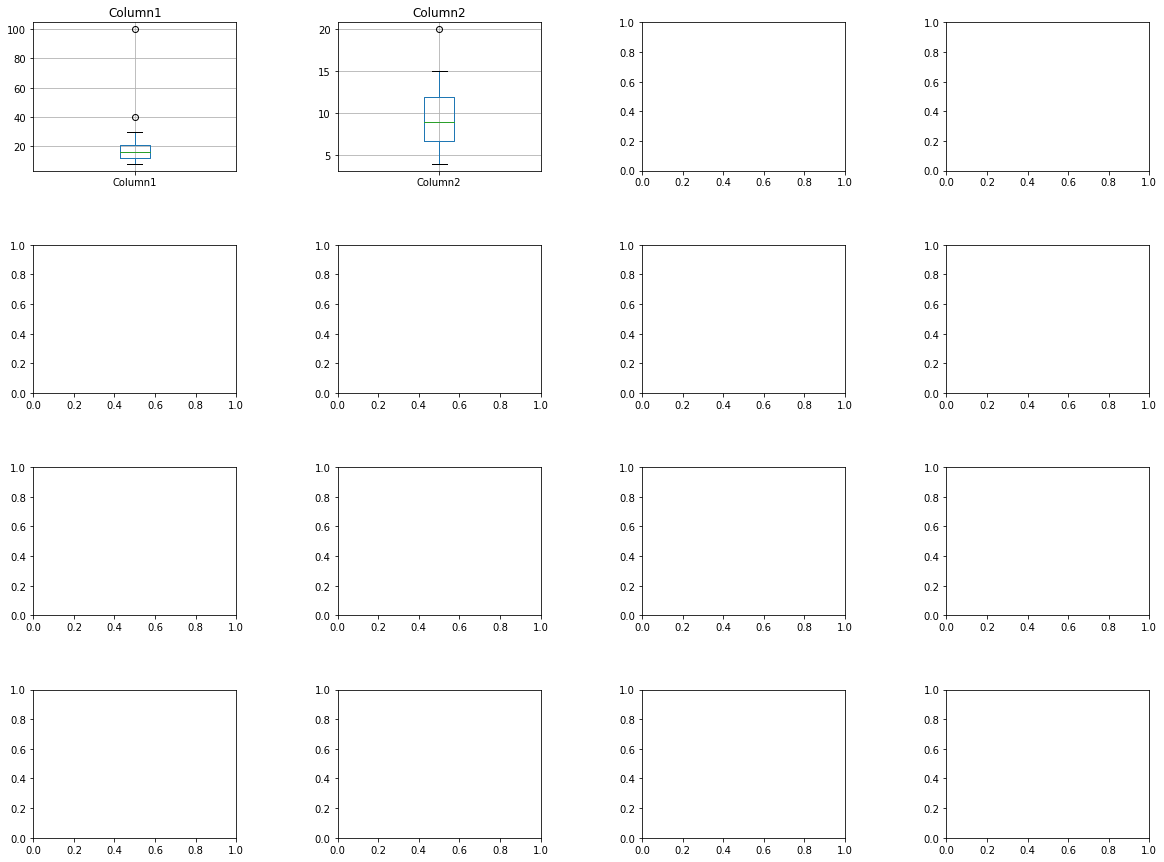

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have your DataFrame, you can read it or create it as follows:
# df = pd.read_csv('your_data.csv')  # Replace 'your_data.csv' with the actual file path

# For demonstration purposes, let's create a sample DataFrame:
data = {
    'Column1': [10, 12, 15, 20, 8, 25, 30, 40, 9, 17, 100, 12, 11, 14, 19, 18],
    'Column2': [5, 6, 7, 8, 10, 12, 15, 4, 6, 8, 7, 10, 12, 13, 11, 20],
}

df = pd.DataFrame(data)

# Function to detect outliers using Z-score
def detect_outliers_zscore(dataframe, threshold=3):
    z_scores = dataframe.apply(lambda x: (x - x.mean()) / x.std())
    return dataframe[(z_scores > threshold).any(axis=1)]

# Function to create box plots for all columns
def create_box_plots(dataframe):
    fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 15))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    axes = axes.flatten()
    
    for i, column in enumerate(dataframe.columns):
        dataframe.boxplot(column, ax=axes[i])
        axes[i].set_title(column)
        
    plt.show()

# Call the functions to detect outliers and create box plots
outliers_df = detect_outliers_zscore(df)
create_box_plots(df)
